# Dubai Properties

#### Данные
- trans_group_en – тип транзакции (покупка/подарок/ипотека)
- procedure_name_en – тип процедуры покупки
- instance_date – дата покупки
- property_type_en – тип объекта недвижимости
- property_sub_type_en – подтип объекта недвижимости
- property_usage_en – назначение объекта недвижимости
- reg_type_en – тип готовности объекта
- area_name_en – название района/города в Дубае
- building_name_en – название здания
- project_name_en – название ЖК
- master_project_en – название проекта
- nearest_landmark_en – ближайшая достопримечательность
- nearest_metro_en – ближайшее метро
- nearest_mall_en – ближайший ТРЦ
- rooms_en – количество комнат
- has_parking – есть ли паркинг
- procedure_area – площадь
- actual_worth – стоимость
- meter_sale_price – стоимость за квадратный метр

#### TODO
- [x] Импорт данных
- [x] Очистка данных
- [x] Описательная статистика
- [x] Обогащение данными
- [x] Линейная регрессия
- [ ] Neural network
- [ ] Random Forest
- [X] CatBoost
- [ ] Spatio Temporal Lag
- [ ] UI

## 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [672]:
#Импортирование данных

DF = pd.read_csv('Transactions_new.csv')

In [673]:
# Выводим датасет и убеждаемся, что все импортировалось как нужно

DF.head(5)

,transaction_id,procedure_id,trans_group_id,trans_group_ar,trans_group_en,procedure_name_ar,procedure_name_en,instance_date,property_type_id,property_type_ar,...,rooms_en,has_parking,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price,no_of_parties_role_1,no_of_parties_role_2,no_of_parties_role_3
0,1-11-2001-165,11,1,مبايعات,Sales,بيع,Sell,24-02-2001,1,أرض,...,NaN,0,1393.55,1350000.0,968.75,NaN,NaN,1.0,1.0,0.0
1,3-9-2004-223,9,3,هبات,Gifts,هبه,Grant,13-12-2004,4,فيلا,...,NaN,0,1728.00,2790000.0,1614.58,NaN,NaN,1.0,1.0,0.0
2,2-13-1996-119,13,2,رهون,Mortgages,تسجيل رهن,Mortgage Registration,12-03-2001,1,أرض,...,NaN,0,929.03,20000000.0,21527.83,NaN,NaN,1.0,1.0,0.0
3,2-14-2005-222,14,2,رهون,Mortgages,تعديل رهن,Modify Mortgage,20-09-2005,2,مبنى,...,NaN,0,2673.28,25000000.0,9351.81,NaN,NaN,1.0,1.0,0.0
4,3-9-2012-874,9,3,هبات,Gifts,هبه,Grant,11-10-2012,4,فيلا,...,NaN,0,1541.17,9000000.0,5839.72,NaN,NaN,1.0,1.0,0.0


In [674]:
# Оставляем только необходимые нам столбцы

DF = DF[[
    'trans_group_en', 
    'procedure_name_en', 
    'instance_date', 
    'property_sub_type_en', 
    'property_usage_en', 
    'reg_type_en',
    'area_name_en',
    'master_project_en',
    'nearest_landmark_en',
    'nearest_metro_en',
    'nearest_mall_en',
    'rooms_en',
    'has_parking',
    'procedure_area',
    'meter_sale_price',
]]

In [675]:
# Выводим свойства столбцов датасета

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059241 entries, 0 to 1059240
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   trans_group_en        1059241 non-null  object 
 1   procedure_name_en     1059241 non-null  object 
 2   instance_date         1059236 non-null  object 
 3   property_sub_type_en  817279 non-null   object 
 4   property_usage_en     1059241 non-null  object 
 5   reg_type_en           1059241 non-null  object 
 6   area_name_en          1059241 non-null  object 
 7   master_project_en     873552 non-null   object 
 8   nearest_landmark_en   930932 non-null   object 
 9   nearest_metro_en      818462 non-null   object 
 10  nearest_mall_en       813109 non-null   object 
 11  rooms_en              808343 non-null   object 
 12  has_parking           1059241 non-null  int64  
 13  procedure_area        1059241 non-null  float64
 14  meter_sale_price      1059241 non-

In [676]:
# Посчитаем пропуски по столбцам
# Видно, что пропуски в основном в категориальных переменных. Их мы не сможем заменить, поэтому будем избавляться от всех NA.

DF.isna().sum()

trans_group_en               0
procedure_name_en            0
instance_date                5
property_sub_type_en    241962
property_usage_en            0
reg_type_en                  0
area_name_en                 0
master_project_en       185689
nearest_landmark_en     128309
nearest_metro_en        240779
nearest_mall_en         246132
rooms_en                250898
has_parking                  0
procedure_area               0
meter_sale_price             0
dtype: int64

In [677]:
# Очистка данных

DF.dropna(inplace=True)

In [678]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564755 entries, 764 to 1059234
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   trans_group_en        564755 non-null  object 
 1   procedure_name_en     564755 non-null  object 
 2   instance_date         564755 non-null  object 
 3   property_sub_type_en  564755 non-null  object 
 4   property_usage_en     564755 non-null  object 
 5   reg_type_en           564755 non-null  object 
 6   area_name_en          564755 non-null  object 
 7   master_project_en     564755 non-null  object 
 8   nearest_landmark_en   564755 non-null  object 
 9   nearest_metro_en      564755 non-null  object 
 10  nearest_mall_en       564755 non-null  object 
 11  rooms_en              564755 non-null  object 
 12  has_parking           564755 non-null  int64  
 13  procedure_area        564755 non-null  float64
 14  meter_sale_price      564755 non-null  float64
dt

In [679]:
# Оставляем только интересующие нас типы недвижимости

DF = DF[DF['property_sub_type_en'].isin(['Villa', 'Flat'])]

In [680]:
# Категоризация переменных

DF['trans_group_en'] = DF['trans_group_en'].astype('category')
DF['procedure_name_en'] = DF['procedure_name_en'].astype('category')
DF['property_sub_type_en'] = DF['property_sub_type_en'].astype('category')
DF['property_usage_en'] = DF['property_usage_en'].astype('category')
DF['reg_type_en'] = DF['reg_type_en'].astype('category')
DF['area_name_en'] = DF['area_name_en'].astype('category')
DF['master_project_en'] = DF['master_project_en'].astype('category')
DF['nearest_landmark_en'] = DF['nearest_landmark_en'].astype('category')
DF['nearest_metro_en'] = DF['nearest_metro_en'].astype('category')
DF['nearest_mall_en'] = DF['nearest_mall_en'].astype('category')
DF['rooms_en'] = DF['rooms_en'].astype('category')
DF['has_parking'] = DF['has_parking'].astype('category')
DF['instance_date'] = pd.to_datetime(DF['instance_date'], dayfirst = True)
DF['instance_date'] = pd.to_datetime(DF['instance_date'], format="%d-%m-%y")

In [681]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479529 entries, 764 to 1059234
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   trans_group_en        479529 non-null  category      
 1   procedure_name_en     479529 non-null  category      
 2   instance_date         479529 non-null  datetime64[ns]
 3   property_sub_type_en  479529 non-null  category      
 4   property_usage_en     479529 non-null  category      
 5   reg_type_en           479529 non-null  category      
 6   area_name_en          479529 non-null  category      
 7   master_project_en     479529 non-null  category      
 8   nearest_landmark_en   479529 non-null  category      
 9   nearest_metro_en      479529 non-null  category      
 10  nearest_mall_en       479529 non-null  category      
 11  rooms_en              479529 non-null  category      
 12  has_parking           479529 non-null  category      
 

## 2. Обогащение данными

### 2.1 Геокодинг
В рамках геокодинга добавим:
- координаты объекта
- расстояние до метро
- расстояние до ТРЦ
- расстояние до ближайшей достопримечательности

In [683]:
# Импортируем библиотеки геокодинга

from geopy.geocoders import Nominatim
from geopy import distance

In [684]:
# Уникальные названия ЖК, по ним будем искать их координаты

print(DF['master_project_en'].unique())

['Springs - 7', 'Springs - 5', 'Springs - 1', 'Springs - 2', 'Springs - 3', ..., 'Lakes - Hattan II', 'Meadows 7', 'Meadows 2', 'Emirates Hills', 'DUBAI HILLS - SIDRA 1']
Length: 71
Categories (71, object): ['Al Furjan', 'Arabian Ranches - Saheel', 'Arjan', 'Burj Khalifa', ..., 'The Lagoons', 'Uptown Mirdif', 'Wasl 1', 'Wasl Gate']


In [685]:
# Инициализируем геолокатор

geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")

In [686]:
# Сформируем отдельный датасеты для геокодинга, тк основной датасет очень большой

DF_master_project = pd.DataFrame({
    "master_project_en": DF['master_project_en'].unique()
})

DF_metro = pd.DataFrame({
    "nearest_metro_en": DF['nearest_metro_en'].unique()
})

DF_landmark = pd.DataFrame({
    "nearest_landmark_en": DF['nearest_landmark_en'].unique()
})

DF_mall = pd.DataFrame({
    "nearest_mall_en": DF['nearest_mall_en'].unique()
})

In [687]:
# Добавим новый столбец с полным адресом и сделаем геокодинг

DF_master_project['full_address'] = DF_master_project.master_project_en.astype("str") + ', Dubai, United Arab Emirates'
DF_master_project['gcode'] = DF_master_project.full_address.apply(geolocator.geocode)

DF_metro['full_address'] = DF_metro.nearest_metro_en.astype("str") + ', Dubai, United Arab Emirates'
DF_metro['gcode'] = DF_metro.full_address.apply(geolocator.geocode)

DF_landmark['full_address'] = DF_landmark.nearest_landmark_en.astype("str") + ', Dubai, United Arab Emirates'
DF_landmark['gcode'] = DF_landmark.full_address.apply(geolocator.geocode)

DF_mall['full_address'] = DF_mall.nearest_mall_en.astype("str") + ', Dubai, United Arab Emirates'
DF_mall['gcode'] = DF_mall.full_address.apply(geolocator.geocode)

In [688]:
# Добавим координаты широты и долготы

DF_master_project['lat'] = [None if g is None else g.latitude for g in DF_master_project.gcode]
DF_master_project['long'] = [None if g is None else g.longitude or None for g in DF_master_project.gcode]

DF_metro['lat'] = [None if g is None else g.latitude for g in DF_metro.gcode]
DF_metro['long'] = [None if g is None else g.longitude or None for g in DF_metro.gcode]

DF_landmark['lat'] = [None if g is None else g.latitude for g in DF_landmark.gcode]
DF_landmark['long'] = [None if g is None else g.longitude or None for g in DF_landmark.gcode]

DF_mall['lat'] = [None if g is None else g.latitude for g in DF_mall.gcode]
DF_mall['long'] = [None if g is None else g.longitude or None for g in DF_mall.gcode]

DF_master_project

,master_project_en,full_address,gcode,lat,long
0,Springs - 7,"Springs - 7, Dubai, United Arab Emirates","(الينابيع ٧, دبي, الإمارات العربية المتحدة, (2...",25.063880,55.191513
1,Springs - 5,"Springs - 5, Dubai, United Arab Emirates","(الينابيع ٥, دبي, الإمارات العربية المتحدة, (2...",25.064057,55.187041
2,Springs - 1,"Springs - 1, Dubai, United Arab Emirates","(الينابيع 1, مركز دبي المالي العالمي, دبي, الإ...",25.061119,55.160821
3,Springs - 2,"Springs - 2, Dubai, United Arab Emirates","(الينابيع 2, دبي, الإمارات العربية المتحدة, (2...",25.057409,55.167019
4,Springs - 3,"Springs - 3, Dubai, United Arab Emirates","(الينابيع 3, دبي, الإمارات العربية المتحدة, (2...",25.057884,55.176046
...,...,...,...,...,...
66,Lakes - Hattan II,"Lakes - Hattan II, Dubai, United Arab Emirates",None,NaN,NaN
67,Meadows 7,"Meadows 7, Dubai, United Arab Emirates","(Meadows 7, مركز دبي المالي العالمي, دبي, الإم...",25.062077,55.178963
68,Meadows 2,"Meadows 2, Dubai, United Arab Emirates","(ميدوز 2, دبي, الإمارات العربية المتحدة, (25.0...",25.069485,55.151440
69,Emirates Hills,"Emirates Hills, Dubai, United Arab Emirates","(Emirates Hills, تلال الإمارات, دبي, الإمارات ...",25.067788,55.183385


In [689]:
# Вручную добавим недостающие координаты для ЖК

DF_master_project.loc[DF_master_project['master_project_en'] == 'International Media Production Zone', 'lat'] = 25.033542993655033
DF_master_project.loc[DF_master_project['master_project_en'] == 'International Media Production Zone', 'long'] = 55.18917001485356
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site C', 'lat'] = 25.097428719611617
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site C', 'long'] = 55.17756110264013
DF_master_project.loc[DF_master_project['master_project_en'] == 'Down Town Jabal Ali', 'lat'] = 24.96105936394376
DF_master_project.loc[DF_master_project['master_project_en'] == 'Down Town Jabal Ali', 'long'] = 55.08270192949124
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site B', 'lat'] = 25.094272787442044
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site B', 'long'] = 55.175560083372986
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Investment Park First', 'lat'] = 25.000211714542417
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Investment Park First', 'long'] = 55.16834169258494
DF_master_project.loc[DF_master_project['master_project_en'] == 'The Lagoons', 'lat'] = 25.19770179006602
DF_master_project.loc[DF_master_project['master_project_en'] == 'The Lagoons', 'long'] = 55.355695124267285
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site A', 'lat'] = 25.09214442690163
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site A', 'long'] = 55.15783349732667
DF_master_project.loc[DF_master_project['master_project_en'] == 'Jumeriah Beach Residence - JBR', 'lat'] = 25.083137305514395 
DF_master_project.loc[DF_master_project['master_project_en'] == 'Jumeriah Beach Residence - JBR', 'long'] = 55.139013137811546
DF_master_project.at[24, 'lat'] = 25.083137305514395 
DF_master_project.at[24, 'long'] = 55.139013137811546
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Health Care City Phase 1', 'lat'] = 25.23606273566597
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Health Care City Phase 1', 'long'] = 55.32270853013264
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Health Care City Phase 2', 'lat'] = 25.232945714600916
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Health Care City Phase 2', 'long'] = 55.32351188330427
DF_master_project.loc[DF_master_project['master_project_en'] == 'HADAEQ SHEIKH MOHAMMED BIN RASHID - DISRICT 7', 'lat'] = 25.19949550070485 
DF_master_project.loc[DF_master_project['master_project_en'] == 'HADAEQ SHEIKH MOHAMMED BIN RASHID - DISRICT 7', 'long'] = 55.27392556849345
DF_master_project.loc[DF_master_project['master_project_en'] == 'DMCC-EZ2', 'lat'] = 25.07247559744288 
DF_master_project.loc[DF_master_project['master_project_en'] == 'DMCC-EZ2', 'long'] = 55.1392704930149
DF_master_project.loc[DF_master_project['master_project_en'] == 'Lakes - Hattan II', 'lat'] = 25.081750780370683 
DF_master_project.loc[DF_master_project['master_project_en'] == 'Lakes - Hattan II', 'long'] = 55.16575089175726
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 1', 'lat'] = 25.09335555736875
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 1', 'long'] = 55.25403781082174
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 2', 'lat'] = 25.098416484757895
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 2', 'long'] = 55.25332656664681
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 3', 'lat'] = 25.10582583562555
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 3', 'long'] = 55.255374215092395
DF_master_project.loc[DF_master_project['master_project_en'] == "Emaar's Street Of Dreams", 'lat'] = 25.195915926712992
DF_master_project.loc[DF_master_project['master_project_en'] == "Emaar's Street Of Dreams", 'long'] = 55.277645310842416 

DF_master_project

,master_project_en,full_address,gcode,lat,long
0,Springs - 7,"Springs - 7, Dubai, United Arab Emirates","(الينابيع ٧, دبي, الإمارات العربية المتحدة, (2...",25.063880,55.191513
1,Springs - 5,"Springs - 5, Dubai, United Arab Emirates","(الينابيع ٥, دبي, الإمارات العربية المتحدة, (2...",25.064057,55.187041
2,Springs - 1,"Springs - 1, Dubai, United Arab Emirates","(الينابيع 1, مركز دبي المالي العالمي, دبي, الإ...",25.061119,55.160821
3,Springs - 2,"Springs - 2, Dubai, United Arab Emirates","(الينابيع 2, دبي, الإمارات العربية المتحدة, (2...",25.057409,55.167019
4,Springs - 3,"Springs - 3, Dubai, United Arab Emirates","(الينابيع 3, دبي, الإمارات العربية المتحدة, (2...",25.057884,55.176046
...,...,...,...,...,...
66,Lakes - Hattan II,"Lakes - Hattan II, Dubai, United Arab Emirates",None,25.081751,55.165751
67,Meadows 7,"Meadows 7, Dubai, United Arab Emirates","(Meadows 7, مركز دبي المالي العالمي, دبي, الإم...",25.062077,55.178963
68,Meadows 2,"Meadows 2, Dubai, United Arab Emirates","(ميدوز 2, دبي, الإمارات العربية المتحدة, (25.0...",25.069485,55.151440
69,Emirates Hills,"Emirates Hills, Dubai, United Arab Emirates","(Emirates Hills, تلال الإمارات, دبي, الإمارات ...",25.067788,55.183385


In [690]:
DF_metro

,nearest_metro_en,full_address,gcode,lat,long
0,Damac Properties,"Damac Properties, Dubai, United Arab Emirates","(دبي مارينا, شارع الشيخ زايد, تلال الإمارات, د...",25.079953,55.147594
1,Nakheel Metro Station,"Nakheel Metro Station, Dubai, United Arab Emir...",None,NaN,NaN
2,Dubai Internet City,"Dubai Internet City, Dubai, United Arab Emirates","(Dubai Internet City, قرية المعرفة, دبي, الإما...",25.095598,55.161734
3,Mina Seyahi,"Mina Seyahi, Dubai, United Arab Emirates","(الميناء السياحي Mina Seyahi, شارع الملك سلمان...",25.091045,55.148646
4,DANUBE Metro Station,"DANUBE Metro Station, Dubai, United Arab Emirates","(Danube Metro Station, شارع الشيخ زايد, جبل عل...",25.001297,55.095679
5,Ibn Battuta Metro Station,"Ibn Battuta Metro Station, Dubai, United Arab ...",(Bus E55 to Ibn Battuta Metro Station (every h...,24.885431,55.158962
6,Rashidiya Metro Station,"Rashidiya Metro Station, Dubai, United Arab Em...","(Rashidiya Metro Station Car Park (Red Line), ...",25.229569,55.391476
7,First Abu Dhabi Bank Metro Station,"First Abu Dhabi Bank Metro Station, Dubai, Uni...",None,NaN,NaN
8,Noor Bank Metro Station,"Noor Bank Metro Station, Dubai, United Arab Em...",None,NaN,NaN
9,ENERGY Metro Station,"ENERGY Metro Station, Dubai, United Arab Emirates","(Energy Metro Station, شارع الشيخ زايد, جبل عل...",25.026321,55.101285


In [691]:
# Вручную добавим недостающие координаты для метро

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Jumeirah Beach Residency', 'lat'] = 25.079982099455968
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Jumeirah Beach Residency', 'long'] = 55.138149278107555

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Marina Mall Metro Station', 'lat'] = 25.076428135523372
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Marina Mall Metro Station', 'long'] = 55.14197616849133

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Buj Khalifa Dubai Mall Metro Station', 'lat'] = 25.201611651560157
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Buj Khalifa Dubai Mall Metro Station', 'long'] = 55.26950781266849

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Nakheel Metro Station', 'lat'] = 25.08899029789469 
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Nakheel Metro Station', 'long'] = 55.15809260783653

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Jumeirah Beach Resdency', 'lat'] = 25.074385143932265
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Jumeirah Beach Resdency', 'long'] = 55.132397009931175

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Business Bay Metro Station', 'lat'] = 25.19145596093731
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Business Bay Metro Station', 'long'] = 55.26030076849341

DF_metro.loc[DF_metro['nearest_metro_en'] == 'First Abu Dhabi Bank Metro Station', 'lat'] = 25.120000197937358
DF_metro.loc[DF_metro['nearest_metro_en'] == 'First Abu Dhabi Bank Metro Station', 'long'] = 55.19958610120157

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Jadaf Metro Station', 'lat'] = 25.225180015939067
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Jadaf Metro Station', 'long'] = 55.33365092616389

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Creek Metro Station', 'lat'] = 25.219379082537397
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Creek Metro Station', 'long'] = 55.33883459548382

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Healthcare City Metro Station', 'lat'] = 25.23107478400269
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Healthcare City Metro Station', 'long'] = 55.32279349732888

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Jafiliya Metro Station', 'lat'] = 25.2337450495845
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Jafiliya Metro Station', 'long'] = 55.29209721082395

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Noor Bank Metro Station', 'lat'] = 25.155942586558552
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Noor Bank Metro Station', 'long'] = 55.22849041082285

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Ghubaiba Metro Station', 'lat'] = 25.265013251747984
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Ghubaiba Metro Station', 'long'] = 55.287912496065125

DF_metro

,nearest_metro_en,full_address,gcode,lat,long
0,Damac Properties,"Damac Properties, Dubai, United Arab Emirates","(دبي مارينا, شارع الشيخ زايد, تلال الإمارات, د...",25.079953,55.147594
1,Nakheel Metro Station,"Nakheel Metro Station, Dubai, United Arab Emir...",None,25.088990,55.158093
2,Dubai Internet City,"Dubai Internet City, Dubai, United Arab Emirates","(Dubai Internet City, قرية المعرفة, دبي, الإما...",25.095598,55.161734
3,Mina Seyahi,"Mina Seyahi, Dubai, United Arab Emirates","(الميناء السياحي Mina Seyahi, شارع الملك سلمان...",25.091045,55.148646
4,DANUBE Metro Station,"DANUBE Metro Station, Dubai, United Arab Emirates","(Danube Metro Station, شارع الشيخ زايد, جبل عل...",25.001297,55.095679
5,Ibn Battuta Metro Station,"Ibn Battuta Metro Station, Dubai, United Arab ...",(Bus E55 to Ibn Battuta Metro Station (every h...,24.885431,55.158962
6,Rashidiya Metro Station,"Rashidiya Metro Station, Dubai, United Arab Em...","(Rashidiya Metro Station Car Park (Red Line), ...",25.229569,55.391476
7,First Abu Dhabi Bank Metro Station,"First Abu Dhabi Bank Metro Station, Dubai, Uni...",None,25.120000,55.199586
8,Noor Bank Metro Station,"Noor Bank Metro Station, Dubai, United Arab Em...",None,25.155943,55.228490
9,ENERGY Metro Station,"ENERGY Metro Station, Dubai, United Arab Emirates","(Energy Metro Station, شارع الشيخ زايد, جبل عل...",25.026321,55.101285


In [692]:
DF_landmark

,nearest_landmark_en,full_address,gcode,lat,long
0,Sports City Swimming Academy,"Sports City Swimming Academy, Dubai, United Ar...",None,NaN,NaN
1,Burj Al Arab,"Burj Al Arab, Dubai, United Arab Emirates","(برج العرب, شارع جميرا, أم سقيم 3, أم سقيم, دب...",25.141263,55.185404
2,Motor City,"Motor City, Dubai, United Arab Emirates","(Motor City, موتور سيتي, دبي, الإمارات العربية...",25.047102,55.238270
3,Expo 2020 Site,"Expo 2020 Site, Dubai, United Arab Emirates",None,NaN,NaN
4,Dubai International Airport,"Dubai International Airport, Dubai, United Ara...","(مطار دبي الدولي, 3b شارع, Al Qusais 2, Dubai,...",25.252129,55.365716
5,Global Village,"Global Village, Dubai, United Arab Emirates","(Global village, Indian Chaat Bazaar, وادي الص...",25.069410,55.311058
6,IMG World Adventures,"IMG World Adventures, Dubai, United Arab Emirates",None,NaN,NaN
7,Downtown Dubai,"Downtown Dubai, Dubai, United Arab Emirates","(وسط مدينة دبي, الخليج التجاري, دبي, الإمارات ...",25.186886,55.274800
8,Burj Khalifa,"Burj Khalifa, Dubai, United Arab Emirates","(برج خليفة, 1, شارع الشيخ محمد بن راشد, وسط مد...",25.197031,55.274222


In [693]:
# Вручную добавим недостающие координаты для достопримечательностей

DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'Sports City Swimming Academy', 'lat'] = 25.042132693409545
DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'Sports City Swimming Academy', 'long'] = 55.21952377218269

DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'Expo 2020 Site', 'lat'] = 24.967218956410264 
DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'Expo 2020 Site', 'long'] = 55.15768472638599

DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'IMG World Adventures', 'lat'] = 25.082279418420768 
DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'IMG World Adventures', 'long'] = 55.3180615792579

DF_landmark

,nearest_landmark_en,full_address,gcode,lat,long
0,Sports City Swimming Academy,"Sports City Swimming Academy, Dubai, United Ar...",None,25.042133,55.219524
1,Burj Al Arab,"Burj Al Arab, Dubai, United Arab Emirates","(برج العرب, شارع جميرا, أم سقيم 3, أم سقيم, دب...",25.141263,55.185404
2,Motor City,"Motor City, Dubai, United Arab Emirates","(Motor City, موتور سيتي, دبي, الإمارات العربية...",25.047102,55.238270
3,Expo 2020 Site,"Expo 2020 Site, Dubai, United Arab Emirates",None,24.967219,55.157685
4,Dubai International Airport,"Dubai International Airport, Dubai, United Ara...","(مطار دبي الدولي, 3b شارع, Al Qusais 2, Dubai,...",25.252129,55.365716
5,Global Village,"Global Village, Dubai, United Arab Emirates","(Global village, Indian Chaat Bazaar, وادي الص...",25.069410,55.311058
6,IMG World Adventures,"IMG World Adventures, Dubai, United Arab Emirates",None,25.082279,55.318062
7,Downtown Dubai,"Downtown Dubai, Dubai, United Arab Emirates","(وسط مدينة دبي, الخليج التجاري, دبي, الإمارات ...",25.186886,55.274800
8,Burj Khalifa,"Burj Khalifa, Dubai, United Arab Emirates","(برج خليفة, 1, شارع الشيخ محمد بن راشد, وسط مد...",25.197031,55.274222


In [694]:
DF_mall

,nearest_mall_en,full_address,gcode,lat,long
0,Marina Mall,"Marina Mall, Dubai, United Arab Emirates","(Marina Mall, دبي مارينا, مرسى دبي, دبي, الإما...",25.075874,55.141919
1,Mall of the Emirates,"Mall of the Emirates, Dubai, United Arab Emirates","(مول الإمارات, 1, شارع السيداف ١, البرشاء 1, ا...",25.118244,55.200362
2,Ibn-e-Battuta Mall,"Ibn-e-Battuta Mall, Dubai, United Arab Emirates",None,NaN,NaN
3,City Centre Mirdif,"City Centre Mirdif, Dubai, United Arab Emirates","(P F Chang, شارع الشيخ محمد بن زايد, مردف, دبي...",25.217343,55.407129
4,Dubai Mall,"Dubai Mall, Dubai, United Arab Emirates","(دبي مول, شارع المركز المالي, وسط مدينة دبي, د...",25.197096,55.279025


In [695]:
# Вручную добавим недостающие координаты для ТРЦ

DF_mall.loc[DF_mall['nearest_mall_en'] == 'Ibn-e-Battuta Mall', 'lat'] = 25.0447415858032
DF_mall.loc[DF_mall['nearest_mall_en'] == 'Ibn-e-Battuta Mall', 'long'] = 55.12027573965596

DF_mall

,nearest_mall_en,full_address,gcode,lat,long
0,Marina Mall,"Marina Mall, Dubai, United Arab Emirates","(Marina Mall, دبي مارينا, مرسى دبي, دبي, الإما...",25.075874,55.141919
1,Mall of the Emirates,"Mall of the Emirates, Dubai, United Arab Emirates","(مول الإمارات, 1, شارع السيداف ١, البرشاء 1, ا...",25.118244,55.200362
2,Ibn-e-Battuta Mall,"Ibn-e-Battuta Mall, Dubai, United Arab Emirates",None,25.044742,55.120276
3,City Centre Mirdif,"City Centre Mirdif, Dubai, United Arab Emirates","(P F Chang, شارع الشيخ محمد بن زايد, مردف, دبي...",25.217343,55.407129
4,Dubai Mall,"Dubai Mall, Dubai, United Arab Emirates","(دبي مول, شارع المركز المالي, وسط مدينة دبي, د...",25.197096,55.279025


Теперь у нас есть дополнительные 4 датасета, которые содержат в себе координаты объектов.
На основе этих координат мы можем обогатить основной датасет расстояниями от ЖК до:
- До ближайшего метро
- До ближайшего ТРЦ
- До ближайшей достопримечательности

### 2.2 Обогащение данными
В основной датасет добавим расстояния:
- До ближайшего метро
- До ближайшего ТРЦ
- До ближайшей достопримечательности

In [696]:
# Добавим в основной датасет столбец с расстоянием до метро/достопримечательности/трц

distance_to_metro_col = []
distance_to_landmark_col = []
distance_to_mall_col = []


for index, row in DF.iterrows():
    # master_project
    master_project_match = DF_master_project.loc[row['master_project_en'] == DF_master_project['master_project_en']]
    master_project_lat = master_project_match.lat.values[0]
    master_project_long = master_project_match.long.values[0]
    master_project_coordinates = (master_project_lat, master_project_long)
    
    # metro
    metro_match = DF_metro.loc[row['nearest_metro_en'] == DF_metro['nearest_metro_en']]
    metro_lat = metro_match.lat.values[0]
    metro_long = metro_match.long.values[0]
    metro_coordinates = (metro_lat, metro_long)
    distance_to_metro = distance.distance(master_project_coordinates, metro_coordinates).m
    distance_to_metro_col.append(distance_to_metro)
    
    # landmark
    landmark_match = DF_landmark.loc[row['nearest_landmark_en'] == DF_landmark['nearest_landmark_en']]
    landmark_lat = landmark_match.lat.values[0]
    landmark_long = landmark_match.long.values[0]
    landmark_coordinates = (landmark_lat, landmark_long)
    distance_to_landmark = distance.distance(master_project_coordinates, landmark_coordinates).m
    distance_to_landmark_col.append(distance_to_landmark)
    
    # mall
    mall_match = DF_mall.loc[row['nearest_mall_en'] == DF_mall['nearest_mall_en']]
    mall_lat = mall_match.lat.values[0]
    mall_long = mall_match.long.values[0]
    mall_coordinates = (mall_lat, mall_long)
    distance_to_mall = distance.distance(master_project_coordinates, mall_coordinates).m
    distance_to_mall_col.append(distance_to_mall)
    
DF['distance_to_metro'] = distance_to_metro_col
DF['distance_to_landmark'] = distance_to_landmark_col
DF['distance_to_mall'] = distance_to_mall_col


DF


,trans_group_en,procedure_name_en,instance_date,property_sub_type_en,property_usage_en,reg_type_en,area_name_en,master_project_en,nearest_landmark_en,nearest_metro_en,nearest_mall_en,rooms_en,has_parking,procedure_area,meter_sale_price,distance_to_metro,distance_to_landmark,distance_to_mall
764,Mortgages,Mortgage Registration,2010-03-30,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,3 B/R,0,331.30,4542.71,4775.360648,3713.843980,5177.005216
765,Mortgages,Mortgage Registration,2015-10-26,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,2 B/R,0,315.31,3996.07,4775.360648,3713.843980,5177.005216
766,Sales,Lease to Own Registration,2007-11-22,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,257.69,2568.54,4019.665126,4079.460028,4736.895258
767,Sales,Sell,2007-11-22,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,455.83,5045.74,4019.665126,4079.460028,4736.895258
768,Sales,Sell,2007-08-01,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,455.83,4058.53,4019.665126,4079.460028,4736.895258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059076,Sales,Sell - Pre registration,2023-04-05,Flat,Residential,Off-Plan Properties,Al Barsha South Fourth,Jumeirah Village Circle,Sports City Swimming Academy,Dubai Internet City,Mall of the Emirates,Studio,1,58.03,14147.85,6175.706636,2261.982665,6493.259126
1059084,Sales,Sell - Pre registration,2023-03-29,Flat,Residential,Off-Plan Properties,Al Khairan First,The Lagoons,Dubai International Airport,Creek Metro Station,City Centre Mirdif,2 B/R,1,103.29,17609.53,2941.699306,6113.173101,5621.592002
1059085,Sales,Sell - Pre registration,2023-03-21,Flat,Residential,Off-Plan Properties,Al Khairan First,The Lagoons,Dubai International Airport,Creek Metro Station,City Centre Mirdif,1 B/R,1,59.66,23481.19,2941.699306,6113.173101,5621.592002
1059086,Sales,Sell - Pre registration,2023-03-30,Flat,Residential,Off-Plan Properties,Al Khairan First,The Lagoons,Dubai International Airport,Creek Metro Station,City Centre Mirdif,1 B/R,1,65.53,23178.51,2941.699306,6113.173101,5621.592002


In [697]:
# Попробовать посчитать расстояние прямоугольником, посмотреть параметры функции distance
# UPD: не получилось, такой функции нет

In [698]:
DF.to_csv('./Transactions_geocoded.csv', index=False)
#DF = pd.read_csv('Transactions_geocoded.csv')

In [699]:
DF.head()

,trans_group_en,procedure_name_en,instance_date,property_sub_type_en,property_usage_en,reg_type_en,area_name_en,master_project_en,nearest_landmark_en,nearest_metro_en,nearest_mall_en,rooms_en,has_parking,procedure_area,meter_sale_price,distance_to_metro,distance_to_landmark,distance_to_mall
764,Mortgages,Mortgage Registration,2010-03-30,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,3 B/R,0,331.30,4542.71,4775.360648,3713.843980,5177.005216
765,Mortgages,Mortgage Registration,2015-10-26,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,2 B/R,0,315.31,3996.07,4775.360648,3713.843980,5177.005216
766,Sales,Lease to Own Registration,2007-11-22,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,257.69,2568.54,4019.665126,4079.460028,4736.895258
767,Sales,Sell,2007-11-22,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,455.83,5045.74,4019.665126,4079.460028,4736.895258
768,Sales,Sell,2007-08-01,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,455.83,4058.53,4019.665126,4079.460028,4736.895258


## 3. Статистический анализ

### 3.1 Проверка на нормальность и выбросы


In [700]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479529 entries, 764 to 1059234
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   trans_group_en        479529 non-null  category      
 1   procedure_name_en     479529 non-null  category      
 2   instance_date         479529 non-null  datetime64[ns]
 3   property_sub_type_en  479529 non-null  category      
 4   property_usage_en     479529 non-null  category      
 5   reg_type_en           479529 non-null  category      
 6   area_name_en          479529 non-null  category      
 7   master_project_en     479529 non-null  category      
 8   nearest_landmark_en   479529 non-null  category      
 9   nearest_metro_en      479529 non-null  category      
 10  nearest_mall_en       479529 non-null  category      
 11  rooms_en              479529 non-null  category      
 12  has_parking           479529 non-null  category      
 

#### 3.1.1 Стоимость за кв. метр


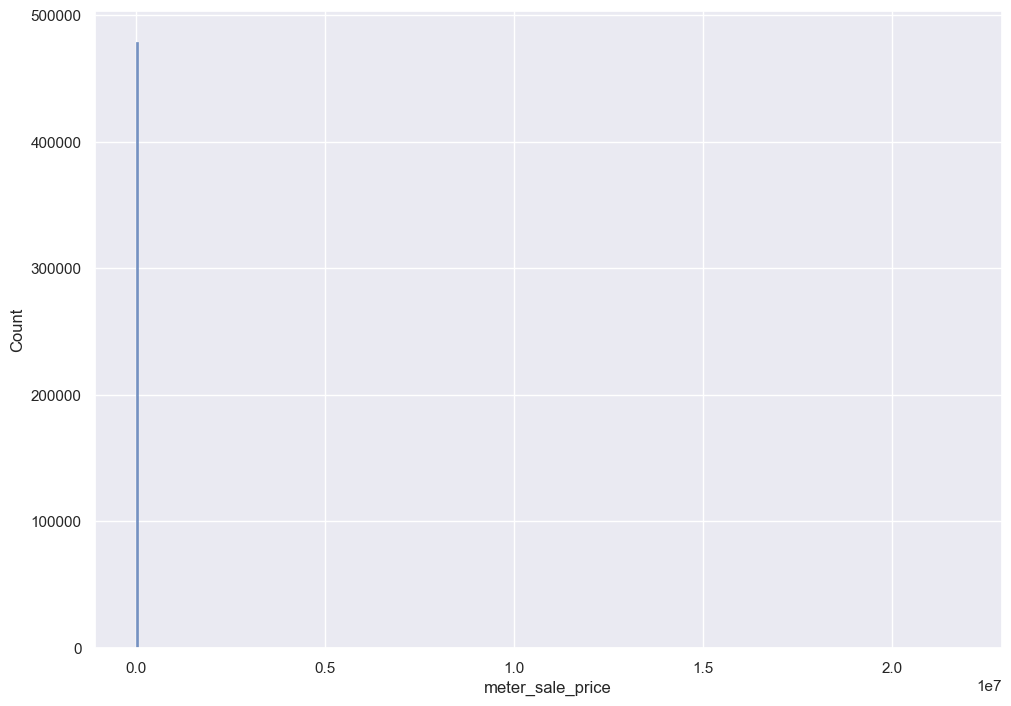

In [701]:
# Проверка на нормальность распределения цены за кв. м.

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(DF['meter_sale_price'], bins=300)
plt.show()

<Axes: xlabel='meter_sale_price'>

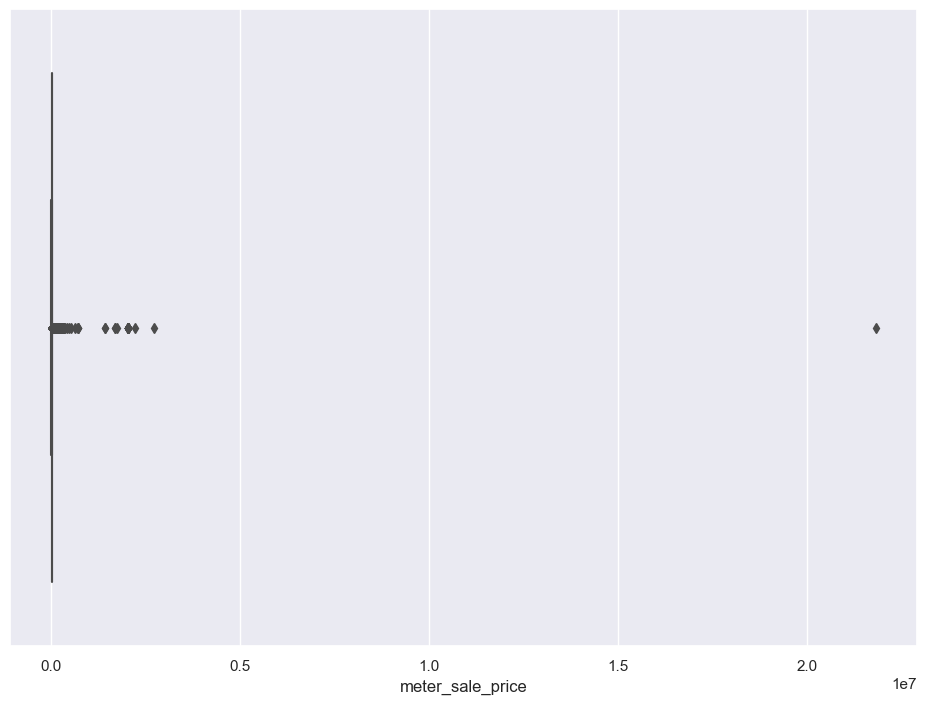

In [702]:
sns.boxplot(x=DF["meter_sale_price"])

In [703]:
# Функция поиска выбросов

def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
   return outliers

In [704]:
outliers = find_outliers_IQR(DF['meter_sale_price'])

print('number of rows: '+ str(len(DF['meter_sale_price'])))

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

number of rows: 479529
number of outliers: 20346
max outlier value: 21811987.51
min outlier value: 25944.08


In [705]:
# Избавляемся от выбросов

cols = ['meter_sale_price'] # one or more

Q1 = DF[cols].quantile(0.25)
Q3 = DF[cols].quantile(0.75)
IQR = Q3 - Q1

DF = DF[~((DF[cols] < (Q1 - 1.5 * IQR)) |(DF[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: xlabel='meter_sale_price'>

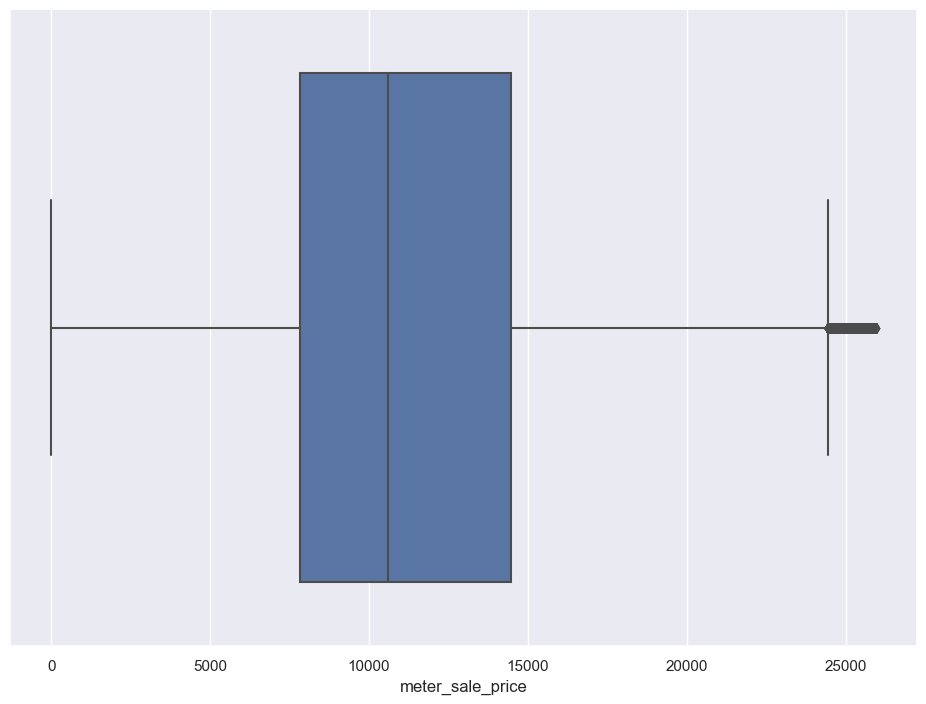

In [706]:
sns.boxplot(x=DF["meter_sale_price"])

<Axes: xlabel='meter_sale_price', ylabel='Count'>

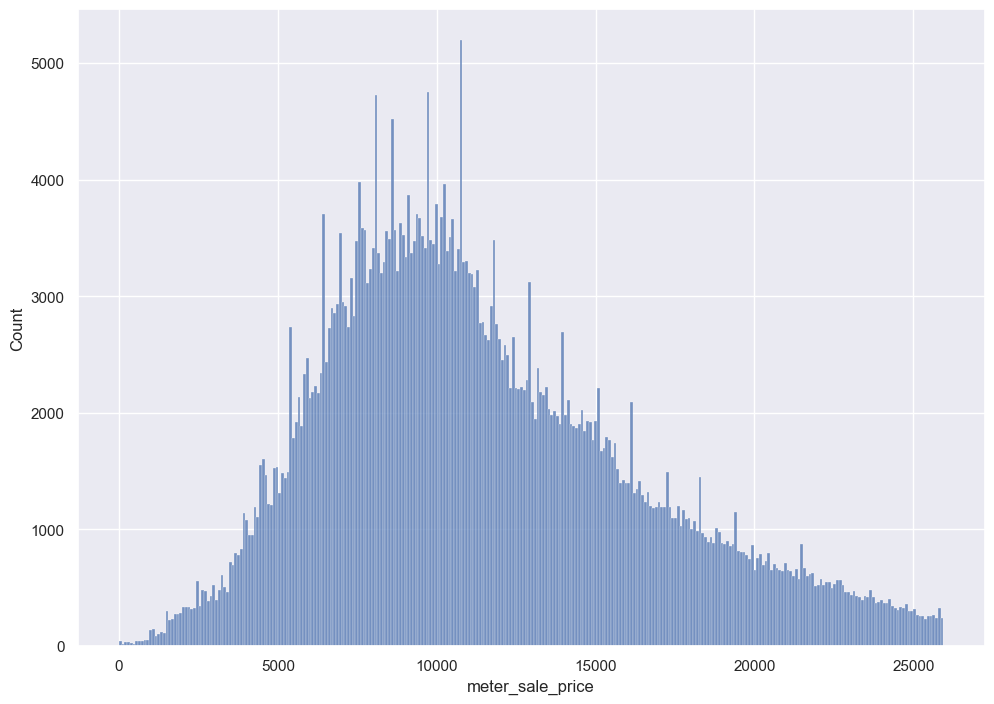

In [707]:
sns.histplot(DF['meter_sale_price'], bins=300)


#### 3.1.2 Площадь

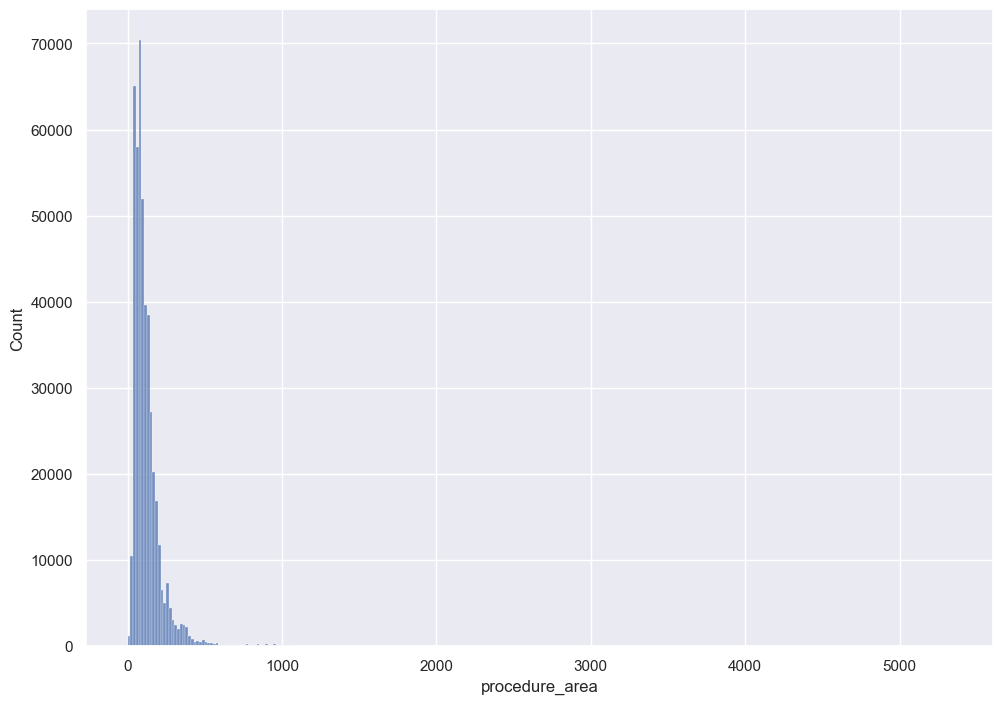

In [709]:
# Проверка на нормальность распределения площади

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(DF['procedure_area'], bins=300)
plt.show()

<Axes: xlabel='procedure_area'>

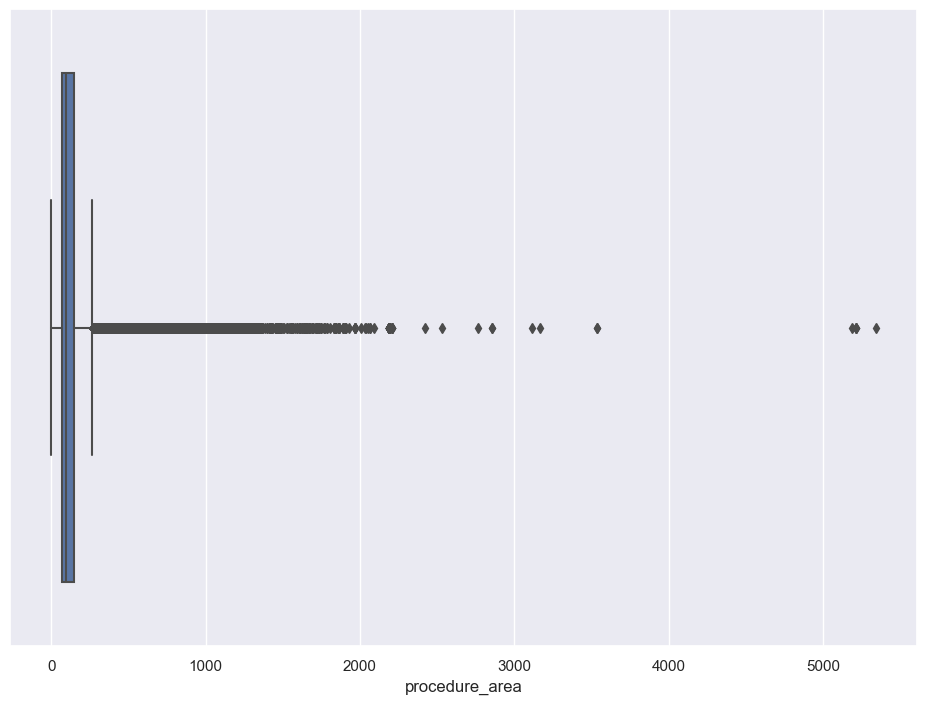

In [710]:
sns.boxplot(x=DF["procedure_area"])

In [711]:
outliers_sq = find_outliers_IQR(DF['procedure_area'])

print('number of rows: '+ str(len(DF['procedure_area'])))

print('number of outliers: '+ str(len(outliers_sq)))

print('max outlier value: '+ str(outliers_sq.max()))

print('min outlier value: '+ str(outliers_sq.min()))

number of rows: 459183
number of outliers: 29235
max outlier value: 5339.17
min outlier value: 267.7


In [712]:
# Избавляемся от выбросов

cols = ['procedure_area'] # one or more

Q1 = DF[cols].quantile(0.25)
Q3 = DF[cols].quantile(0.75)
IQR = Q3 - Q1

DF = DF[~((DF[cols] < (Q1 - 1.5 * IQR)) |(DF[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: xlabel='procedure_area', ylabel='Count'>

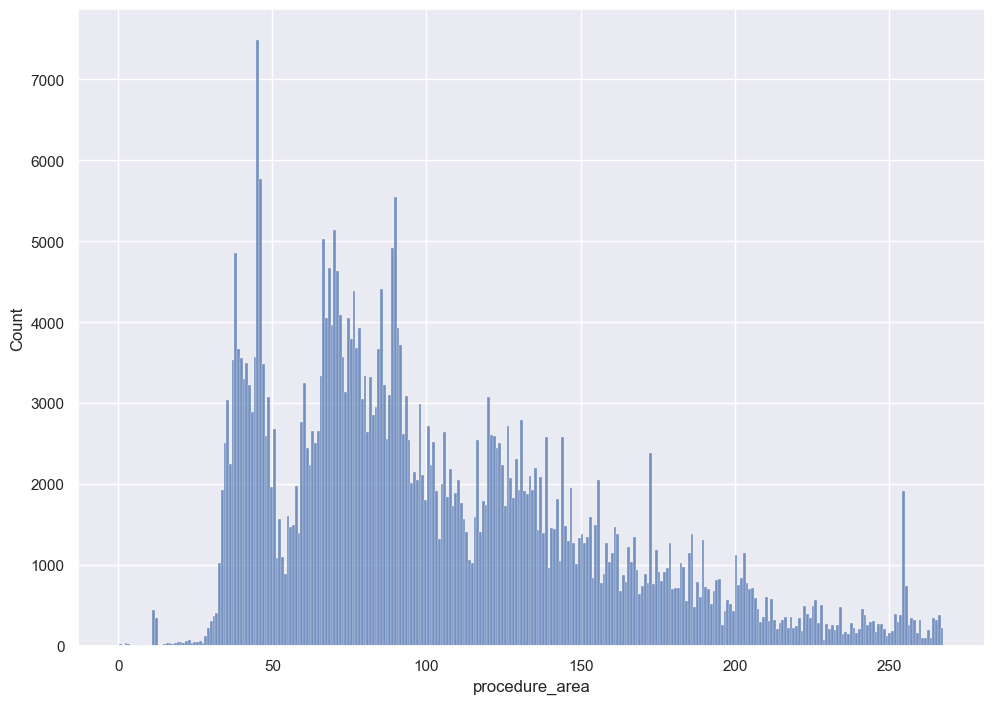

In [713]:
sns.histplot(DF['procedure_area'], bins=300)

<Axes: xlabel='procedure_area'>

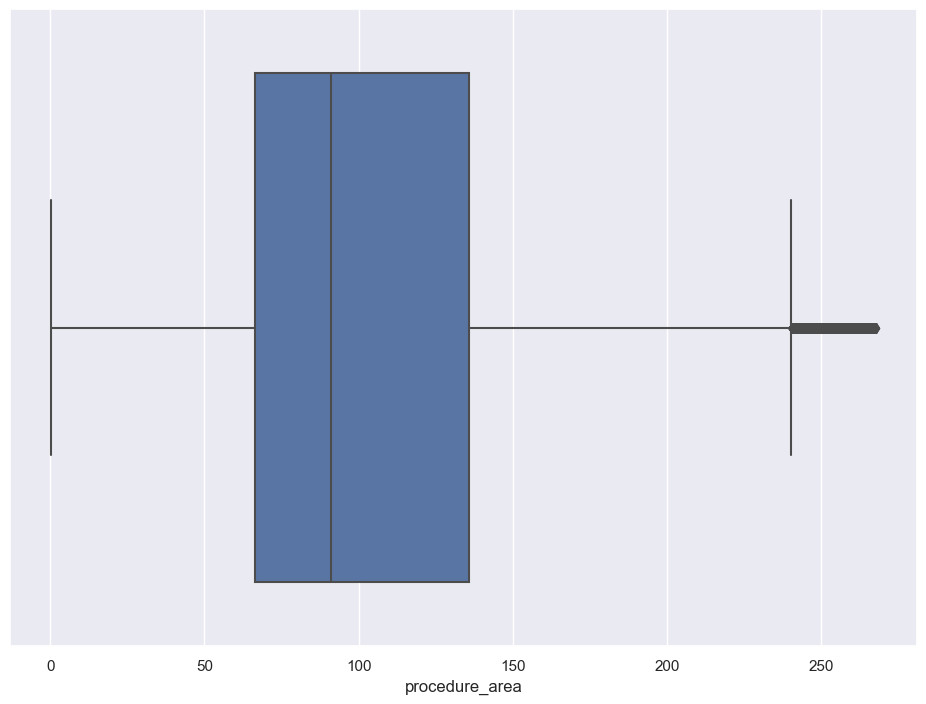

In [714]:
sns.boxplot(x=DF["procedure_area"])

### 3.2 Тренд изменения цены

In [792]:
price_trend_data = DF.groupby([DF['instance_date'].dt.date, 'property_sub_type_en']).mean()

flats = DF[DF['property_sub_type_en'] == 'Flat']
price_trend_data_flats = flats.groupby([DF['instance_date'].dt.date]).mean()

/var/folders/9f/500sy9zd7rz3wynbf95sk3q40000gq/T/ipykernel_27386/2387785675.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_trend_data = DF.groupby([DF['instance_date'].dt.date, 'property_sub_type_en']).mean()
/var/folders/9f/500sy9zd7rz3wynbf95sk3q40000gq/T/ipykernel_27386/2387785675.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_trend_data_flats = flats.groupby([DF['instance_date'].dt.date]).mean()


In [796]:
price_trend_data

procedure_area  meter_sale_price  \
instance_date property_sub_type_en                                     
2004-05-05    Flat                      143.037500       8856.695000   
              Villa                            NaN               NaN   
2004-05-06    Flat                      167.440000       7754.200000   
              Villa                            NaN               NaN   
2004-05-22    Flat                      175.290000       7986.760000   
...                                            ...               ...   
2023-04-12    Villa                     215.240000      10830.706250   
2023-04-13    Flat                       91.120067      13059.432886   
              Villa                     201.038000       9874.826000   
2023-04-14    Flat                       78.150476      14213.263810   
              Villa                            NaN               NaN   

                                    distance_to_metro  distance_to_landmark  \
instance_date property_sub_type_en                                            
2004-05-05    Flat                           0.000000           8148.440930   
              Villa                               NaN                   NaN   
2004-05-06    Flat                           0.000000           8148.440930   
              Villa                               NaN                   NaN   
2004-05-22    Flat                           0.000000           8148.440930   
...                                               ...                   ...   
2023-04-12    Villa                       5786.374551           4770.794115   
2023-04-13    Flat                        4800.482688           4232.542057   
              Villa                       9490.685805           5375.444604   
2023-04-14    Flat                       15176.312546           3763.510715   
              Villa                               NaN                   NaN   

                                    distance_to_mall  
instance_date property_sub_type_en                    
2004-05-05    Flat                       3593.510772  
              Villa                              NaN  
2004-05-06    Flat                       3593.510772  
              Villa                              NaN  
2004-05-22    Flat                       3593.510772  
...                                              ...  
2023-04-12    Villa                      6003.055597  
2023-04-13    Flat                       4716.186922  
              Villa                      4831.805087  
2023-04-14    Flat                       6484.509653  
              Villa                              NaN  

[9028 rows x 5 columns]

KeyError: "['instance_date'] not in index"

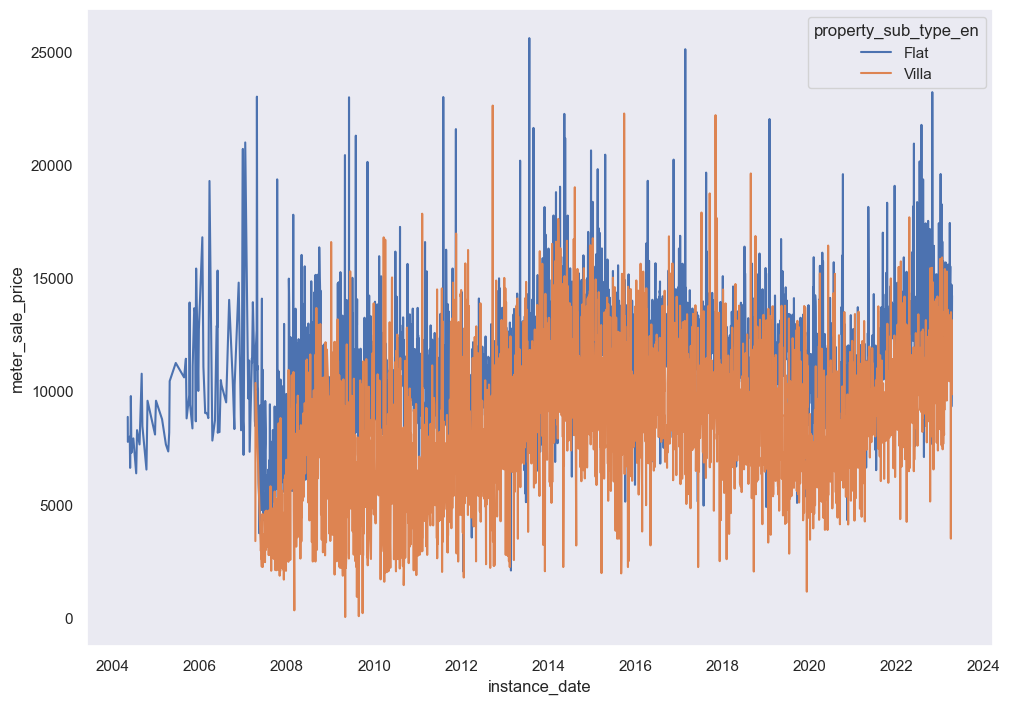

In [795]:
sns.lineplot(x = 'instance_date', y = 'meter_sale_price', data = price_trend_data, hue = 'property_sub_type_en')
sns.lmplot(x = 'instance_date', y = 'meter_sale_price', data = price_trend_data_flats)


### 3.2 Описательная статистика

In [743]:
# Уникальные категории типа транзакции

print(DF['trans_group_en'].unique())

['Sales', 'Mortgages', 'Gifts']
Categories (3, object): ['Gifts', 'Mortgages', 'Sales']


In [744]:
# Период данных

print('Min Date:', DF['instance_date'].min())
print('Max Date:', DF['instance_date'].max())

Min Date: 2004-05-05 00:00:00
Max Date: 2023-04-14 00:00:00


In [745]:
# Уникальные категории подтипа недвижимости

print(DF['property_sub_type_en'].unique())

['Villa', 'Flat']
Categories (2, object): ['Flat', 'Villa']


In [746]:
# Уникальные категории типа назначения помещения

print(DF['property_usage_en'].unique())

['Residential', 'Commercial']
Categories (3, object): ['Commercial', 'Other', 'Residential']


In [747]:
# Уникальные категории типа готовности

print(DF['reg_type_en'].unique())

['Existing Properties', 'Off-Plan Properties']
Categories (2, object): ['Existing Properties', 'Off-Plan Properties']


In [748]:
# Уникальные категории района

print(DF['area_name_en'].unique())

['Al Thanayah Fourth', 'Al Thanyah Third', 'Al Barsha South Fourth', 'Mirdif', 'Dubai Investment Park First', ..., 'Al Kifaf', 'Madinat Dubai Almelaheyah', 'Al Safouh Second', 'Jabal Ali', 'Um Hurair Second']
Length: 33
Categories (34, object): ['Al Barsha South Fifth', 'Al Barsha South Fourth', 'Al Barshaa South Second', 'Al Barshaa South Third', ..., 'Nad Al Shiba First', 'Palm Jumeirah', 'Um Hurair Second', 'Wadi Al Safa 6']


In [749]:
print(DF['master_project_en'].unique())

['Springs - 5', 'Springs - 7', 'Springs - 2', 'Springs - 1', 'Springs - 3', ..., 'Dubai Health Care City Phase 1', 'Lakes - Ghadeer', 'Jumeirah Park', 'DUBAI HILLS - GOLF GROVE', 'DUBAI HILLS - CLUB VILLAS']
Length: 58
Categories (71, object): ['Al Furjan', 'Arabian Ranches - Saheel', 'Arjan', 'Burj Khalifa', ..., 'The Lagoons', 'Uptown Mirdif', 'Wasl 1', 'Wasl Gate']


In [750]:
# Описательная статистика площади

DF['procedure_area'].describe()

count    429948.000000
mean        104.713423
std          53.183040
min           0.300000
25%          66.260000
50%          91.140000
75%         135.920000
max         267.670000
Name: procedure_area, dtype: float64

In [751]:
# Описательная статистика стоимости

DF['meter_sale_price'].describe()

count    429948.000000
mean      11688.072177
std        4904.700567
min           0.010000
25%        8070.000000
50%       10764.210000
75%       14675.042500
max       25943.400000
Name: meter_sale_price, dtype: float64

In [752]:
# Описательная статистика расстояния до метро, в метрах

DF['distance_to_metro'].describe()

count    429948.000000
mean       4225.449415
std        5349.751432
min           0.000000
25%         695.155326
50%        1744.005562
75%        6175.706636
max       25307.077838
Name: distance_to_metro, dtype: float64

In [753]:
# Описательная статистика расстояния до достопримечательности, в метрах

DF['distance_to_landmark'].describe()

count    429948.000000
mean       5069.912756
std        3512.213132
min           0.000000
25%        1558.512474
50%        5513.633151
75%        8344.028669
max       15091.771997
Name: distance_to_landmark, dtype: float64

In [754]:
# Описательная статистика расстояния до ТЦ, в метрах

DF['distance_to_mall'].describe()

count    429948.000000
mean       3738.274670
std        3158.845152
min         421.836071
25%         739.178337
50%        3256.614794
75%        6687.332455
max       11629.098059
Name: distance_to_mall, dtype: float64

### 3.2 Корреляция

<Axes: >

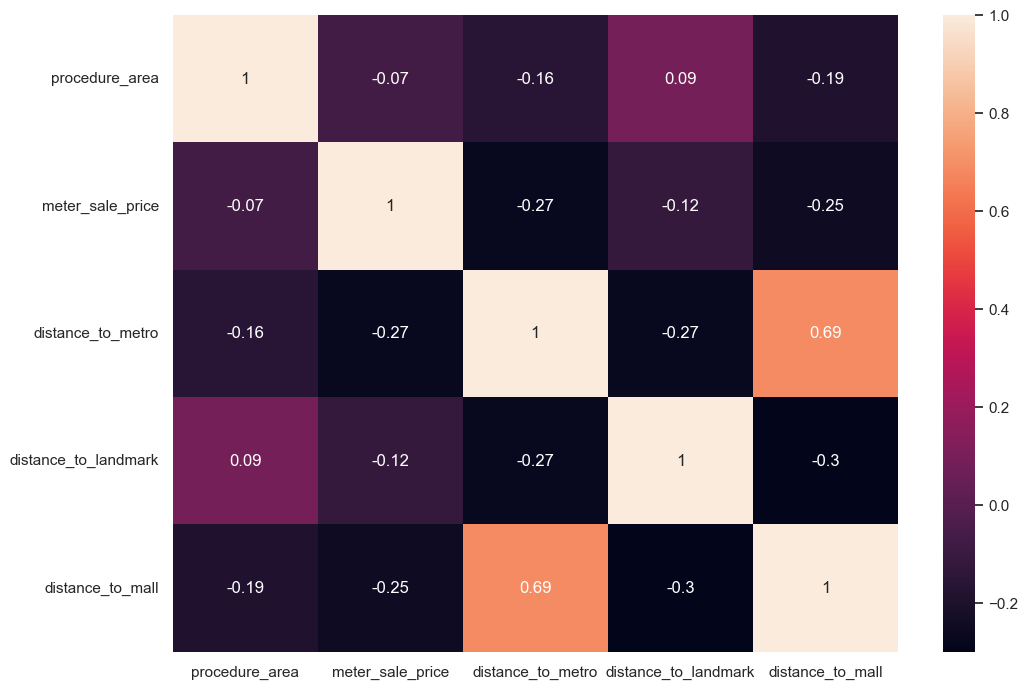

In [755]:
# Корреляция для числовых признаков

correlation_matrix = DF.corr(numeric_only = True).round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# Корреляция для категориальных. Средняя стоимость кв.м для разных категорий

### 3.2 Визуализация

In [581]:
# Размер надписей на графиках
PLOT_LABEL_FONT_SIZE = 14 
# Генерация цветовой схемы
# Возвращает список цветов
def getColors(n):
    COLORS = []
    cm = plt.cm.get_cmap('hsv', n)
    for i in np.arange(n):
        COLORS.append(cm(i))
    return COLORS

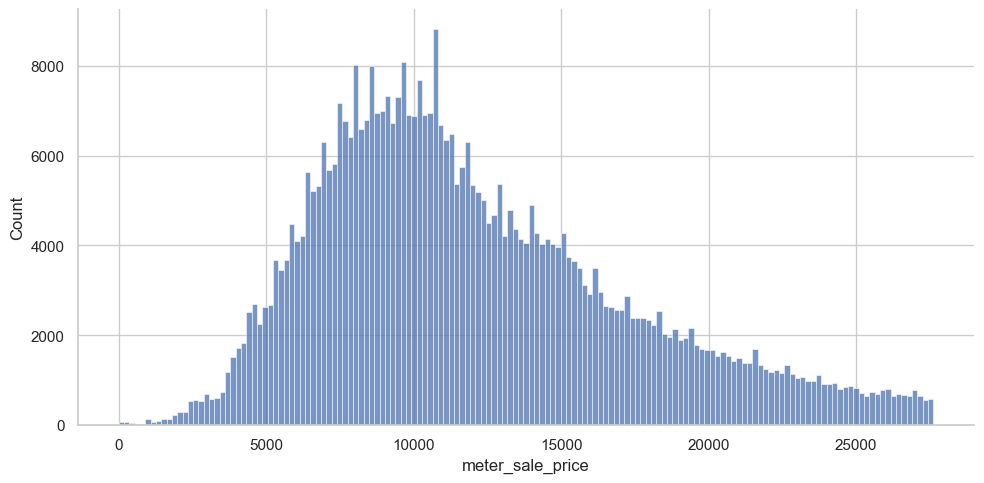

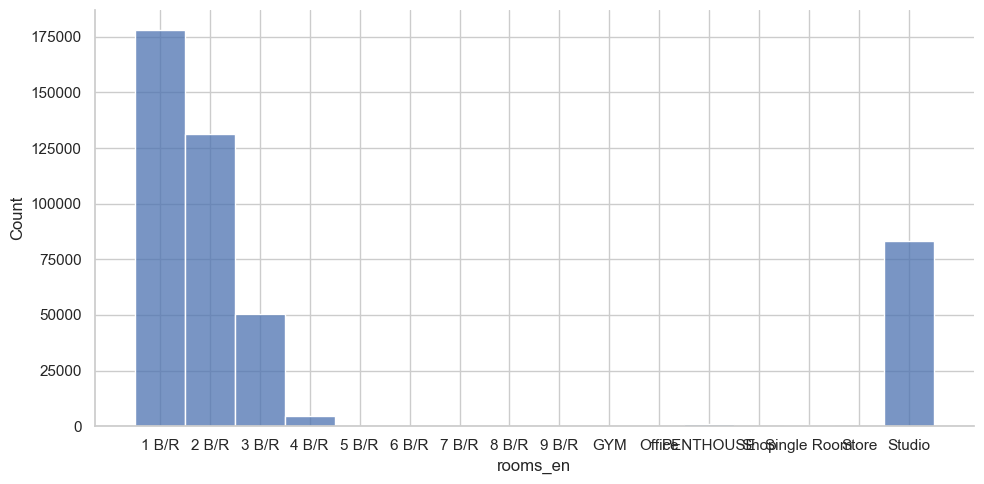

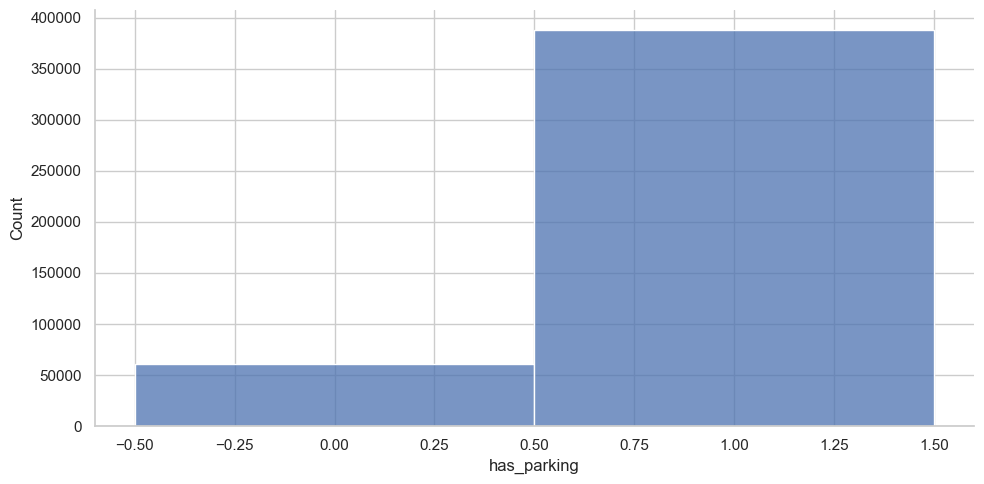

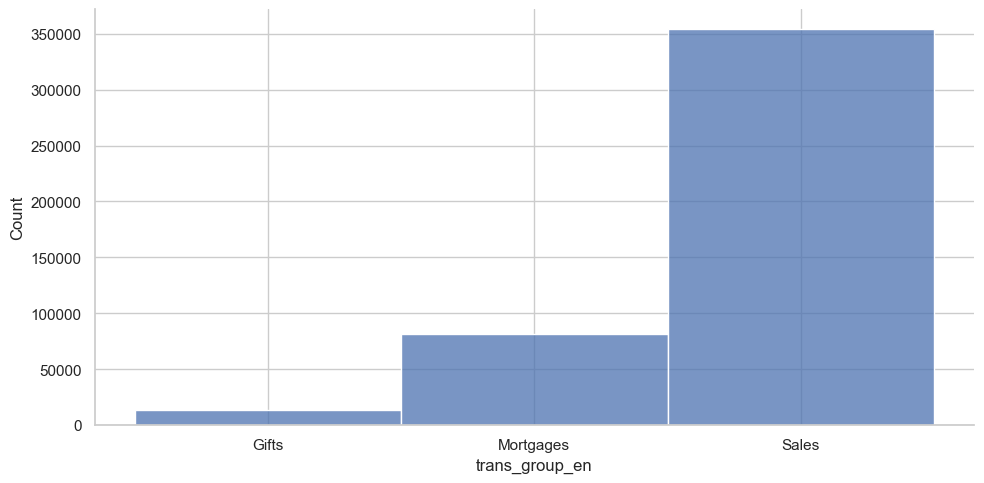

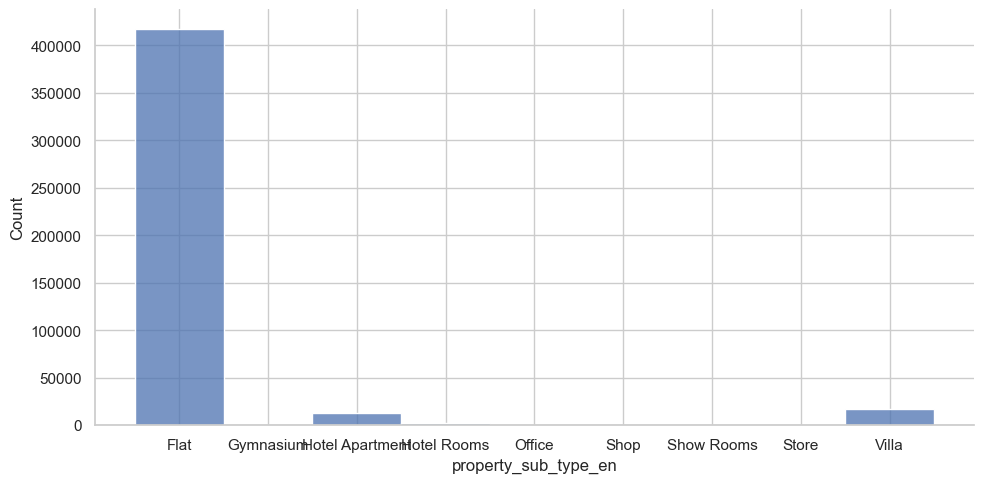

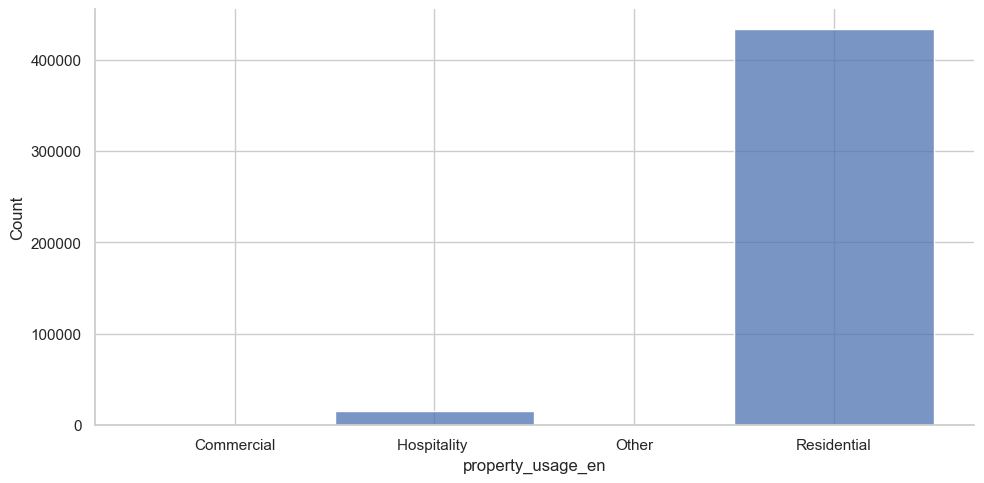

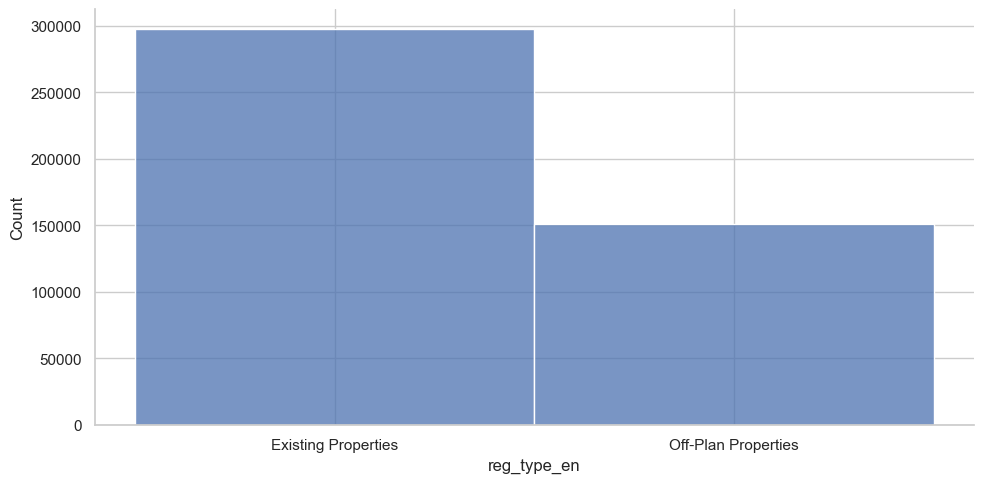

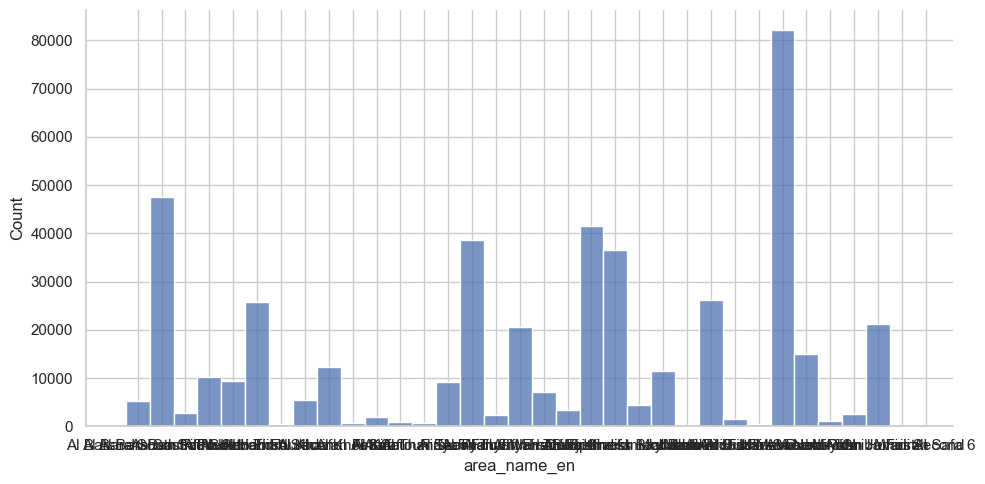

In [583]:
sns.set_style("whitegrid")

sns.displot(DF, x="meter_sale_price", kde=False, height=5, aspect=2)
sns.displot(DF, x="rooms_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="has_parking", kde=False, height=5, aspect=2)
sns.displot(DF, x="trans_group_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="property_sub_type_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="property_usage_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="reg_type_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="area_name_en", kde=False, height=5, aspect=2)

## 4. Регрессия и модели машинного обучения

### 4.1 Линейная регрессия


In [797]:
from sklearn.linear_model import LinearRegression

In [798]:
DF_numeric = DF.select_dtypes(include=np.number)

In [799]:
DF_numeric

,procedure_area,meter_sale_price,distance_to_metro,distance_to_landmark,distance_to_mall
766,257.69,2568.54,4019.665126,4079.460028,4736.895258
769,172.53,10323.13,4019.665126,4079.460028,4736.895258
772,254.28,7078.81,4775.360648,3713.843980,5177.005216
774,231.53,7342.46,4775.360648,3713.843980,5177.005216
778,172.52,3494.60,4775.360648,3713.843980,5177.005216
...,...,...,...,...,...
1059076,58.03,14147.85,6175.706636,2261.982665,6493.259126
1059084,103.29,17609.53,2941.699306,6113.173101,5621.592002
1059085,59.66,23481.19,2941.699306,6113.173101,5621.592002
1059086,65.53,23178.51,2941.699306,6113.173101,5621.592002


In [800]:
DF_categorical = DF.select_dtypes(include='category')

In [801]:
DF_categorical

,trans_group_en,procedure_name_en,property_sub_type_en,property_usage_en,reg_type_en,area_name_en,master_project_en,nearest_landmark_en,nearest_metro_en,nearest_mall_en,rooms_en,has_parking
766,Sales,Lease to Own Registration,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0
769,Sales,Sell,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,2 B/R,0
772,Sales,Sell,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,2 B/R,0
774,Mortgages,Mortgage Registration,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,2 B/R,0
778,Sales,Sell,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,2 B/R,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1059076,Sales,Sell - Pre registration,Flat,Residential,Off-Plan Properties,Al Barsha South Fourth,Jumeirah Village Circle,Sports City Swimming Academy,Dubai Internet City,Mall of the Emirates,Studio,1
1059084,Sales,Sell - Pre registration,Flat,Residential,Off-Plan Properties,Al Khairan First,The Lagoons,Dubai International Airport,Creek Metro Station,City Centre Mirdif,2 B/R,1
1059085,Sales,Sell - Pre registration,Flat,Residential,Off-Plan Properties,Al Khairan First,The Lagoons,Dubai International Airport,Creek Metro Station,City Centre Mirdif,1 B/R,1
1059086,Sales,Sell - Pre registration,Flat,Residential,Off-Plan Properties,Al Khairan First,The Lagoons,Dubai International Airport,Creek Metro Station,City Centre Mirdif,1 B/R,1


In [802]:
DF_categorical_dummues = pd.get_dummies(data=DF_categorical, drop_first=True)

In [803]:
DF_categorical_dummues

,trans_group_en_Mortgages,trans_group_en_Sales,procedure_name_en_Delayed Lease to Own Modify,procedure_name_en_Delayed Lease to Own Registration,procedure_name_en_Delayed Mortgage,procedure_name_en_Delayed Sell,procedure_name_en_Delayed Sell Lease to Own Registration,procedure_name_en_Development Mortgage,procedure_name_en_Development Registration,procedure_name_en_Development Registration Pre-Registration,...,rooms_en_6 B/R,rooms_en_7 B/R,rooms_en_8 B/R,rooms_en_9 B/R,rooms_en_Office,rooms_en_PENTHOUSE,rooms_en_Shop,rooms_en_Single Room,rooms_en_Studio,has_parking_1
766,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
769,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
772,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
774,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059076,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1059084,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1059085,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1059086,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [804]:
DF_for_regression = DF_numeric.join(DF_categorical_dummues)

In [805]:
DF_for_regression

,procedure_area,meter_sale_price,distance_to_metro,distance_to_landmark,distance_to_mall,trans_group_en_Mortgages,trans_group_en_Sales,procedure_name_en_Delayed Lease to Own Modify,procedure_name_en_Delayed Lease to Own Registration,procedure_name_en_Delayed Mortgage,...,rooms_en_6 B/R,rooms_en_7 B/R,rooms_en_8 B/R,rooms_en_9 B/R,rooms_en_Office,rooms_en_PENTHOUSE,rooms_en_Shop,rooms_en_Single Room,rooms_en_Studio,has_parking_1
766,257.69,2568.54,4019.665126,4079.460028,4736.895258,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
769,172.53,10323.13,4019.665126,4079.460028,4736.895258,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
772,254.28,7078.81,4775.360648,3713.843980,5177.005216,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
774,231.53,7342.46,4775.360648,3713.843980,5177.005216,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,172.52,3494.60,4775.360648,3713.843980,5177.005216,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059076,58.03,14147.85,6175.706636,2261.982665,6493.259126,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1059084,103.29,17609.53,2941.699306,6113.173101,5621.592002,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1059085,59.66,23481.19,2941.699306,6113.173101,5621.592002,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1059086,65.53,23178.51,2941.699306,6113.173101,5621.592002,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [806]:
#X = DF_numeric.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
#Y = DF_numeric.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

X = DF_for_regression.drop(columns=['meter_sale_price'])
Y = DF_for_regression['meter_sale_price']

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression

print('Intercept: ', linear_regressor.intercept_)
print('Coef: ', linear_regressor.coef_)

Intercept:  9921.875127811118
Coef:  [-2.75391831e+01 -9.47961782e-02 -1.37418569e+00  2.39369795e+00
 -1.50471350e+03 -3.07460057e+00 -1.35088474e+03 -5.16725869e+02
 -2.68108163e+03  2.21836919e+02 -1.53491034e+03  4.94388368e+02
 -1.76254041e+03  3.78121091e+02 -9.32393010e+02  2.32364846e+03
  1.01031335e+03 -8.93780705e+02 -1.29671207e-09 -2.20072691e+02
 -1.28011735e+03 -2.21471124e+03 -7.66634123e+02 -1.03355613e+03
  1.38531924e+03 -4.68994712e+03  2.55340638e-10  1.71908796e+03
 -1.69209352e+03  2.52261290e+03  1.53490822e+02 -3.85291435e+03
  6.60726377e+02 -1.42814114e+03 -1.68833937e+03 -3.63179356e+03
  2.63670927e+03 -9.51361185e+02  2.56152974e+03  7.88648199e+02
  7.43989345e+01  7.27595761e-12  3.30532232e+03  6.45741238e-11
  1.31473949e+03 -1.41429917e+03 -5.00948304e+03 -3.74778351e+03
 -5.99302652e+03 -8.77108670e+03 -8.71492342e+03 -9.87656949e+03
 -3.89305287e+03  3.09045280e+02 -1.20237229e+03  1.82193162e+02
  1.34791981e+03  9.16786314e+03 -1.26622427e+03  9.7

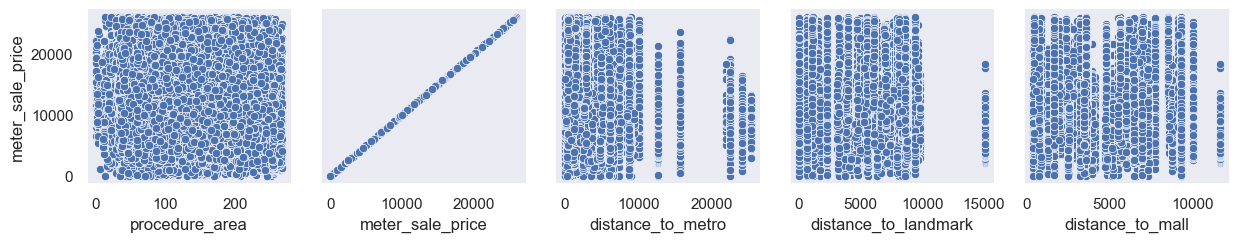

In [807]:
g = sns.PairGrid(DF_numeric, y_vars = ['meter_sale_price'])
g.map(sns.scatterplot)

### 4.2 Catboost
CatBoost — относительно новый алгоритм машинного обучения с открытым исходным кодом, разработанный в 2017 году компанией Яндекс. Яндекс — российский аналог Google, работающий в рамках поисковых и информационных сервисов.

Одним из основных преимуществ CatBoost является его способность интегрировать различные типы данных, такие как изображения, аудио или текстовые функции, в одну структуру. Но CatBoost также предлагает своеобразный способ обработки категориальных данных, требующий минимального преобразования категориальных признаков, в отличие от большинства других алгоритмов машинного обучения, которые не могут обрабатывать нечисловые значения. С точки зрения разработки функций преобразование нечислового состояния в числовые значения может быть очень нетривиальной и утомительной задачей, и CatBoost делает этот шаг устаревшим.

CatBoost основан на теории деревьев решений и повышения градиента.Основная идея бустинга состоит в том, чтобы последовательно объединить множество слабых моделей (модель работает немного лучше, чем случайный случай) и, таким образом, с помощью жадного поиска создать сильную конкурентную прогностическую модель.Поскольку повышение градиента соответствует деревьям решений последовательно, подобранные деревья будут учиться на ошибках прежних деревьев и, следовательно, уменьшать ошибки. Этот процесс добавления новой функции к существующим продолжается до тех пор, пока выбранная функция потерь не перестанет быть минимизированной.

In [808]:
DF.head()

,trans_group_en,procedure_name_en,instance_date,property_sub_type_en,property_usage_en,reg_type_en,area_name_en,master_project_en,nearest_landmark_en,nearest_metro_en,nearest_mall_en,rooms_en,has_parking,procedure_area,meter_sale_price,distance_to_metro,distance_to_landmark,distance_to_mall
766,Sales,Lease to Own Registration,2007-11-22,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,3 B/R,0,257.69,2568.54,4019.665126,4079.460028,4736.895258
769,Sales,Sell,2007-07-08,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 5,Sports City Swimming Academy,Nakheel Metro Station,Marina Mall,2 B/R,0,172.53,10323.13,4019.665126,4079.460028,4736.895258
772,Sales,Sell,2008-06-08,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,2 B/R,0,254.28,7078.81,4775.360648,3713.843980,5177.005216
774,Mortgages,Mortgage Registration,2013-05-08,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,2 B/R,0,231.53,7342.46,4775.360648,3713.843980,5177.005216
778,Sales,Sell,2008-12-21,Villa,Residential,Existing Properties,Al Thanayah Fourth,Springs - 7,Sports City Swimming Academy,Damac Properties,Marina Mall,2 B/R,0,172.52,3494.60,4775.360648,3713.843980,5177.005216


In [809]:
# Разделим датасет. X - зависимые параметры, Y – целевой параметр (цена).

X = DF.drop(columns=['meter_sale_price', 'instance_date', 'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en'])
Y = DF['meter_sale_price']


In [810]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429948 entries, 766 to 1059234
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   trans_group_en        429948 non-null  category
 1   procedure_name_en     429948 non-null  category
 2   property_sub_type_en  429948 non-null  category
 3   property_usage_en     429948 non-null  category
 4   reg_type_en           429948 non-null  category
 5   area_name_en          429948 non-null  category
 6   master_project_en     429948 non-null  category
 7   rooms_en              429948 non-null  category
 8   has_parking           429948 non-null  category
 9   procedure_area        429948 non-null  float64 
 10  distance_to_metro     429948 non-null  float64 
 11  distance_to_landmark  429948 non-null  float64 
 12  distance_to_mall      429948 non-null  float64 
dtypes: category(9), float64(4)
memory usage: 36.2 MB


In [811]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [812]:
# Сформируем модель для регрессии
cbr = CatBoostRegressor(n_estimators=300,
                       loss_function='RMSE',
                       learning_rate=0.6,
                       depth=10, 
                       task_type='CPU',
                       random_state=1,
                       verbose=False,
                       )

# Сформируем датасеты для тренировки модели и предсказания
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# При помощи Pool переведем параметры в формат, подходящий для CatBoost
pool_train = Pool(x_train, y_train,
                  cat_features = [
                      'trans_group_en', 
                      'procedure_name_en', 
                      'property_sub_type_en',
                      'property_usage_en',
                      'reg_type_en',
                      'area_name_en',
                      'master_project_en',
                      'rooms_en',
                      'has_parking',
                  ])

pool_test = Pool(x_test, cat_features = [
                      'trans_group_en', 
                      'procedure_name_en', 
                      'property_sub_type_en',
                      'property_usage_en',
                      'reg_type_en',
                      'area_name_en',
                      'master_project_en',
                      'rooms_en',
                      'has_parking',
                  ])

# Проведем обучение модели
cbr.fit(pool_train)

# Проведем предсказания
y_pred = cbr.predict(pool_test)

# Вычислим эффективность модели
rmse = (np.sqrt(mse(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)


print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

# Кроссвалидация: 10-fold crossvalidation (10 тестовых выборок)
# генерация по параметрам, группировка, средняя цена квадратного метра в течение 3 месяцев до данной транзакции в этом neighborhood, медианная цена квадратного метра with the same number of bedrooms BR

Testing performance
RMSE: 3023.34
R2: 0.62


In [813]:
# Тренд цены: на основе транзакций + сезонность
# В основной датасет добавляем разбивку по месяцам + коэф-ты

In [814]:
Y.describe()

count    429948.000000
mean      11688.072177
std        4904.700567
min           0.010000
25%        8070.000000
50%       10764.210000
75%       14675.042500
max       25943.400000
Name: meter_sale_price, dtype: float64

##### Оценка модели
Видно, что RMSE ниже стандартного отклонения, а R2 достигает 62%, что является высокими показателями. Модель эффективна.

##### Значимость переменных


In [815]:
cbr.get_feature_importance(prettified=True)

,Feature Id,Importances
0,procedure_area,20.955000
1,area_name_en,14.806526
2,distance_to_metro,13.008158
3,distance_to_landmark,9.784365
4,reg_type_en,9.180077
5,procedure_name_en,6.927336
6,trans_group_en,6.779442
7,rooms_en,5.977080
8,distance_to_mall,5.927166
9,master_project_en,4.345998


Text(0.5, 1.0, 'CatBoost features importance:')

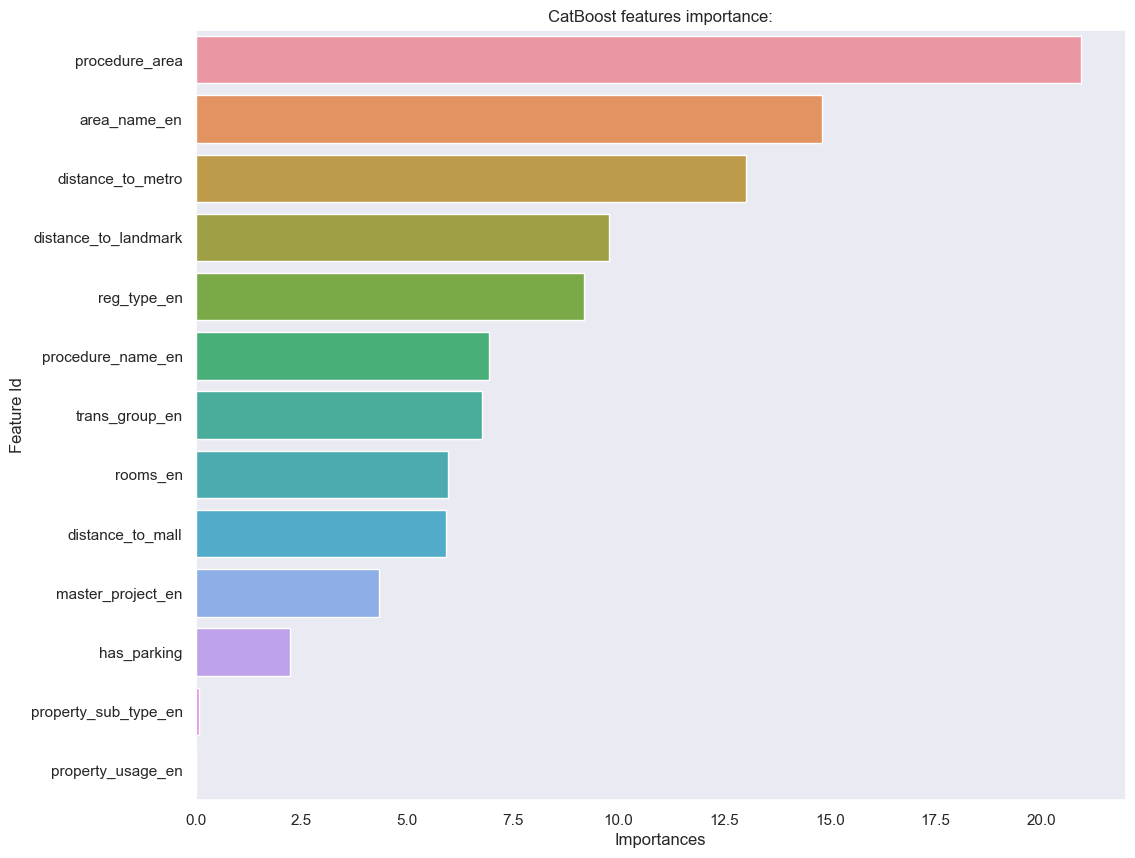

In [816]:
sorted_feature_importance = cbr.get_feature_importance(prettified=True)

plt.figure(figsize=(12, 10))
sns.barplot(x = "Importances", y = "Feature Id", data = sorted_feature_importance)
plt.title('CatBoost features importance:')

### 4.3 Random Forest

In [845]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz
import pydot

In [823]:
# Возьмем датасет, который мы ранее подготовили. В том числе сделали one-hot коддинг категориальных переменных.

DF_for_regression

,procedure_area,meter_sale_price,distance_to_metro,distance_to_landmark,distance_to_mall,trans_group_en_Mortgages,trans_group_en_Sales,procedure_name_en_Delayed Lease to Own Modify,procedure_name_en_Delayed Lease to Own Registration,procedure_name_en_Delayed Mortgage,...,rooms_en_6 B/R,rooms_en_7 B/R,rooms_en_8 B/R,rooms_en_9 B/R,rooms_en_Office,rooms_en_PENTHOUSE,rooms_en_Shop,rooms_en_Single Room,rooms_en_Studio,has_parking_1
766,257.69,2568.54,4019.665126,4079.460028,4736.895258,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
769,172.53,10323.13,4019.665126,4079.460028,4736.895258,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
772,254.28,7078.81,4775.360648,3713.843980,5177.005216,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
774,231.53,7342.46,4775.360648,3713.843980,5177.005216,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,172.52,3494.60,4775.360648,3713.843980,5177.005216,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059076,58.03,14147.85,6175.706636,2261.982665,6493.259126,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1059084,103.29,17609.53,2941.699306,6113.173101,5621.592002,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1059085,59.66,23481.19,2941.699306,6113.173101,5621.592002,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1059086,65.53,23178.51,2941.699306,6113.173101,5621.592002,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [828]:
# Y – массив целевых значений для предсказаний
Y = np.array(DF_for_regression['meter_sale_price'])

# X – массив независимых переменных
X = DF_for_regression.drop('meter_sale_price', axis = 1)

X_list = list(DF_for_regression.columns)

X = np.array(X)

In [829]:
# Сформируем датасеты для тренировки модели и предсказания
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


In [834]:
# Вычислим допустимую ошибку как бенчмарк для модели
baseline_preds = x_test[:, X_list.index('meter_sale_price')]
baseline_errors = abs(baseline_preds - y_test)

print('Baseline error: ', round(np.mean(baseline_errors), 2))


Baseline error:  9357.31


In [859]:
# Создадим random forest модель
rf = RandomForestRegressor(n_estimators = 10, random_state = 42, max_depth = 10)

# train the model
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)

In [864]:
# Сделаем предсказания
predictions = rf.predict(x_test)

# Посчитаем Mean Absolute Error
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 2572.03


In [861]:
X_list = list(DF_for_regression.drop('meter_sale_price', axis = 1).columns)


In [863]:
# Экспорт визуализаци дерева решений. Файл большой, поэтому визуализировать тяжело.
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_list, rounded = True, precision = 1)

In [862]:
# Сделаем модель поменьше для визуализации
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10)

In [856]:
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X_list, rounded = True, precision = 1)

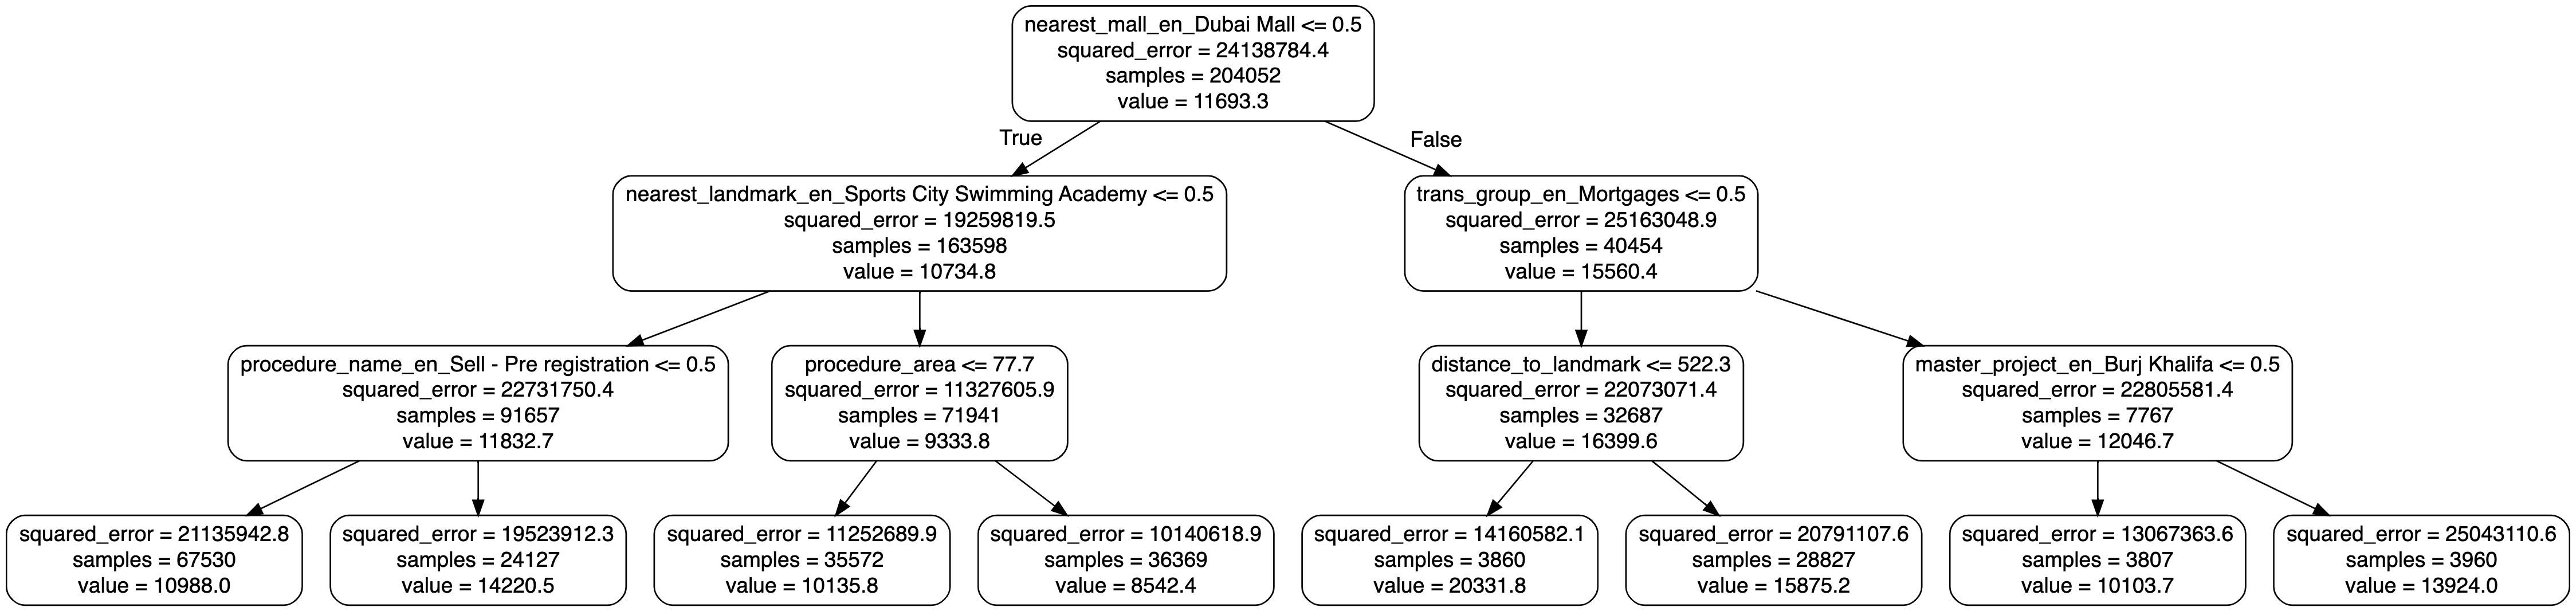

### 4.4 Neural Network на основе библиотеки Keras


In [618]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.optimizers import SGD

In [619]:
# Разделим датасет. X - зависимые параметры, Y – целевой параметр (цена).

#X = DF.drop(columns=['actual_worth', 'instance_date', 'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en'])
X = DF[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']].values
Y = DF['meter_sale_price'].values

In [620]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [368]:
# Сформируем датасеты для тренировки модели и предсказания

#data = DF.drop(columns=['instance_date', 'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en'])

#train, test = train_test_split(data, test_size=0.2)

In [621]:
# Стандартизация числовых переменных

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


#x_train[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']] = scaler.fit_transform(x_train[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']])
#x_test[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']] = scaler.fit_transform(x_test[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']])


In [370]:
# convert the categorical variables to one-hot encoding
#x_train = pd.get_dummies(x_train, columns=['trans_group_en', 'procedure_name_en', 'property_sub_type_en', 'property_usage_en', 'reg_type_en', 'area_name_en', 'master_project_en', 'rooms_en', 'has_parking'])
#x_test = pd.get_dummies(x_test, columns=['trans_group_en', 'procedure_name_en', 'property_sub_type_en', 'property_usage_en', 'reg_type_en', 'area_name_en', 'master_project_en', 'rooms_en', 'has_parking'])

In [622]:
x_train

array([[-0.78309655, -0.69024648, -1.12692024, -0.64581018],
       [ 2.85743077, -0.0793665 , -0.12866188,  0.14043177],
       [ 0.4193921 , -0.65517231, -1.42436912, -1.02212657],
       ...,
       [-1.05136582, -0.69024648, -1.12692024, -0.64581018],
       [ 1.22212177,  0.3712466 , -0.78031913,  0.89302409],
       [-1.23159742, -0.28143978,  1.36238861, -0.36544893]])

In [623]:
# create the neural network model
model = Sequential()
model.add(Dense(400, input_dim=4, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
#model.add(Dense(4, activation='softmax'))
#model.add(Dense(1))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))


In [624]:
y_train

array([17246.91,  3646.63, 19022.39, ..., 20920.42,  5193.8 , 10160.56])

In [625]:
# compile the model

#model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])


In [626]:
# train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size=32)

Epoch 1/25
11227/11227 [==============================] - 15s 1ms/step - loss: 2.5102 - mse: 105994872.0000 - val_loss: 0.7351 - val_mse: 72003744.0000
Epoch 2/25
11227/11227 [==============================] - 14s 1ms/step - loss: 0.4951 - mse: 57588312.0000 - val_loss: 0.3529 - val_mse: 46973568.0000
Epoch 3/25
11227/11227 [==============================] - 13s 1ms/step - loss: 0.2942 - mse: 41206920.0000 - val_loss: 0.2545 - val_mse: 36595696.0000
Epoch 4/25
11227/11227 [==============================] - 20s 2ms/step - loss: 0.2341 - mse: 33900840.0000 - val_loss: 0.2198 - val_mse: 31601174.0000
Epoch 5/25
11227/11227 [==============================] - 24s 2ms/step - loss: 0.2113 - mse: 30226784.0000 - val_loss: 0.2055 - val_mse: 28957588.0000
Epoch 6/25
11227/11227 [==============================] - 16s 1ms/step - loss: 0.2015 - mse: 28210414.0000 - val_loss: 0.1990 - val_mse: 27445994.0000
Epoch 7/25
11227/11227 [==============================] - 13s 1ms/step - loss: 0.1968 - mse: 

In [821]:
# evaluate the model
_, train_mse = model.evaluate(x_train, y_train, verbose=0)
_, test_mse = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot mse during training
plt.subplot(212)
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.show()

AttributeError: 'RandomForestRegressor' object has no attribute 'evaluate'

In [ ]:
# Сформируем датасеты для тренировки модели и предсказания
train, test = train_test_split(DF, test_size=0.2)

# standardize the numerical variables
scaler = StandardScaler()
train[['rooms_en', 'meter_sale_price', 'has_parking']] = scaler.fit_transform(train[['rooms_en', 'meter_sale_price', 'has_parking']])
test[['rooms_en', 'meter_sale_price', 'has_parking']] = scaler.transform(test[['rooms_en', 'meter_sale_price', 'has_parking']])

# convert the categorical variables to one-hot encoding
train = pd.get_dummies(train, columns=['trans_group_en', 'property_type_en', 'property_sub_type_en', 'property_usage_en', 'reg_type_en'])
test = pd.get_dummies(test, columns=['trans_group_en', 'property_type_en', 'property_sub_type_en', 'property_usage_en', 'reg_type_en'])

# create the neural network model
model = Sequential()
model.add(Dense(64, input_dim=train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# train the model
model.fit(train.drop('actual_worth', axis=1), train['actual_worth'], epochs=100, batch_size=32, validation_split=0.2)

# evaluate the model on the test set
score = model.evaluate(test.drop('actual_worth', axis=1), test['actual_worth'], batch_size=32)

# print the mean squared error
print('Mean Squared Error:', score)